In [1]:
import os
import json
import pandas as pd

base_path = "C:\\Users\\HP\\Desktop\\kea\\ecnusse\\Kea\\"

result_path=[
    "output62", # r AnkiDroid
    "output51", # r Markor
    "output42", # r omni

    "output51"
]

root_dir = base_path + result_path[1] + "\\all_states"
dirs = os.listdir(root_dir)

# 筛选出所有的json文件，并按编号排序
json_files = [f for f in dirs if f.endswith('.json')]
json_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

foreground_activities = []

full_name_activities = []

# 逐个读取json文件，并提取"foreground_activity"属性
for json_file in json_files:
    file_path = os.path.join(root_dir, json_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        foreground_activity = data.get('foreground_activity')
        

        if foreground_activity is not None:
            full_name_activities.append(foreground_activity)
            package_name = foreground_activity.split('.', 2)[1]
            activity_name = foreground_activity.rsplit('.', 1)[-1]
            foreground_activities.append(activity_name)
            # if package_name == 'google' or package_name == 'android':
            #     system_activities += 1
            # else:
            #     activity_name = foreground_activity.rsplit('.', 1)[-1]
            #     foreground_activities.append(activity_name)

activities_count = len(foreground_activities)
print(activities_count)
foreground_activities


585


['NexusLauncherActivity',
 'NexusLauncherActivity',
 'IntroActivity',
 'IntroActivity',
 'IntroActivity',
 'IntroActivity',
 'IntroActivity',
 'IntroActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'NexusLauncherActivity',
 'NexusLauncherActivity',
 'NexusLauncherActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'DocumentActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'MainActivity',
 'NexusLauncherActivity',
 'NexusLauncherActivity',
 'MainActivity',
 'MainActivity',
 

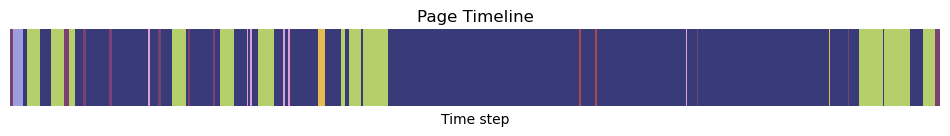

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你有一个页面序列列表，例如：
pages = foreground_activities
unique_pages = list(set(pages))
page_to_id = {p: i for i, p in enumerate(unique_pages)}
page_ids = [page_to_id[p] for p in pages]

plt.figure(figsize=(12, 1))
sns.heatmap([page_ids], cmap="tab20b", cbar=False, xticklabels=False)
plt.yticks([], [])
plt.title("Page Timeline")
plt.xlabel("Time step")
plt.show()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_activity_heatmap(activity_sequence, repeat_threshold=10):
    # 获取唯一页面及映射
    unique_acts = list(dict.fromkeys(activity_sequence))
    act_to_idx = {act: i for i, act in enumerate(unique_acts)}

    # 构建二维数组：一行一个 activity，列表示时间步骤（one-hot 样式）
    n_steps = len(activity_sequence)
    n_acts = len(unique_acts)
    heat_data = np.zeros((n_acts, n_steps))

    for t, act in enumerate(activity_sequence):
        heat_data[act_to_idx[act], t] = 1

    # 画图
    plt.figure(figsize=(20, max(4, len(unique_acts)*0.3)))
    ax = sns.heatmap(
        heat_data, 
        cmap="Blues", 
        cbar=False, 
        xticklabels=50, 
        yticklabels=unique_acts,
        linewidths=0.2,
        linecolor='lightgray'
    )
    plt.xlabel("Step Index")
    plt.ylabel("Activity")
    plt.title("Activity Timeline Heatmap")

    # 检测连续重复段，添加文本标注
    i = 0
    while i < n_steps:
        act = activity_sequence[i]
        j = i + 1
        while j < n_steps and activity_sequence[j] == act:
            j += 1
        run_len = j - i
        if run_len >= repeat_threshold:
            mid = (i + j - 1) // 2
            y = act_to_idx[act]
            ax.text(
                mid, y + 0.5, act,
                ha='center', va='center',
                fontsize=8, color='red',
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
            )
        i = j

    plt.tight_layout()
    plt.show()

# 示例调用
plot_activity_heatmap(foreground_activities, repeat_threshold=5)


In [4]:


# 行程长度编码压缩foreground_activities列表
compressed_activities = []
current_activity = None
count = 0

filtered_activities = []

system_activities = 0

for a in full_name_activities:
    package_name = a.split('.', 2)[1]
    activity_name = a.rsplit('.', 1)[-1]
    if package_name == 'google' or package_name == 'android':
        system_activities+=1
    else:
        filtered_activities.append(activity_name)

for activity in filtered_activities:
    if activity == current_activity:
        count += 1
    else:
        if current_activity is not None:
            compressed_activities.append({"count": count, "name": current_activity})
        current_activity = activity
        count = 1

# 添加最后一个活动
if current_activity is not None:
    compressed_activities.append({"count": count, "name": current_activity})


compressed_activities = [activity for activity in compressed_activities if activity['name'] not in ['IntroductionActivity', 'PermissionsActivity']]

print(compressed_activities)
print(f"System activities: {system_activities}")


activity_count = {}
for activity in filtered_activities:
    if activity in activity_count:
        activity_count[activity] += 1
    else:
        activity_count[activity] = 1

print(activity_count)

[{'count': 6, 'name': 'IntroActivity'}, {'count': 3, 'name': 'MainActivity'}, {'count': 8, 'name': 'DocumentActivity'}, {'count': 7, 'name': 'MainActivity'}, {'count': 12, 'name': 'DocumentActivity'}, {'count': 54, 'name': 'MainActivity'}, {'count': 9, 'name': 'DocumentActivity'}, {'count': 19, 'name': 'MainActivity'}, {'count': 9, 'name': 'DocumentActivity'}, {'count': 13, 'name': 'MainActivity'}, {'count': 10, 'name': 'DocumentActivity'}, {'count': 26, 'name': 'MainActivity'}, {'count': 4, 'name': 'SettingsActivity'}, {'count': 10, 'name': 'MainActivity'}, {'count': 3, 'name': 'DocumentActivity'}, {'count': 2, 'name': 'MainActivity'}, {'count': 8, 'name': 'DocumentActivity'}, {'count': 1, 'name': 'MainActivity'}, {'count': 16, 'name': 'DocumentActivity'}, {'count': 273, 'name': 'MainActivity'}, {'count': 1, 'name': 'SettingsActivity'}, {'count': 17, 'name': 'MainActivity'}, {'count': 15, 'name': 'DocumentActivity'}, {'count': 1, 'name': 'MainActivity'}, {'count': 16, 'name': 'Documen

In [5]:
import json
import hashlib
import os

def sign(view_list):

    child_sigs = [extract_content_free_signature(child) for child in view_list]
    return f"{' '.join(child_sigs)}"

def extract_content_free_signature(view_node):
    sig = view_node.get("content_free_signature", "")

    arr = sig.split("[resource_id]")

    clazz = arr[0]
    resource_id = arr[1]

    # print(clazz)

    component = clazz.split(".")[-1]
    print(component)

    if(resource_id!="none"):
        component+=":"+resource_id.split("/")[-1]
    

    return component


# 筛选出所有的json文件，并按编号排序
dirs = os.listdir(root_dir)

print(dirs)

json_files = [f for f in dirs if f.endswith('.json')]
json_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

print(json_files)

signatures=[]

# 加载 JSON
for json_file in json_files:
    file_path = os.path.join(root_dir, json_file)
    print(file_path)
    
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

        

        # 提取根节点的结构签名
        view_list = data["views"]
        # print(view_list)
        structure_signature = sign(view_list)

        print(structure_signature)

        signatures.append(structure_signature)

        

        # 可选：生成摘要哈希
        # signature_hash = hashlib.md5(structure_signature.encode()).hexdigest()

        # print("Structure Signature (raw):")
        # print(structure_signature[:300] + '...')  # 可截断显示

        # print("\nSignature Hash (MD5):", signature_hash)

        # signatures.append(signature_hash)

signatures



['screen_1.png', 'screen_10.png', 'screen_100.png', 'screen_101.png', 'screen_102.png', 'screen_103.png', 'screen_104.png', 'screen_105.png', 'screen_106.png', 'screen_107.png', 'screen_108.png', 'screen_109.png', 'screen_11.png', 'screen_110.png', 'screen_111.png', 'screen_112.png', 'screen_113.png', 'screen_114.png', 'screen_115.png', 'screen_116.png', 'screen_117.png', 'screen_118.png', 'screen_119.png', 'screen_12.png', 'screen_120.png', 'screen_121.png', 'screen_122.png', 'screen_123.png', 'screen_124.png', 'screen_125.png', 'screen_126.png', 'screen_127.png', 'screen_128.png', 'screen_129.png', 'screen_13.png', 'screen_130.png', 'screen_131.png', 'screen_132.png', 'screen_133.png', 'screen_134.png', 'screen_135.png', 'screen_136.png', 'screen_137.png', 'screen_138.png', 'screen_139.png', 'screen_14.png', 'screen_140.png', 'screen_141.png', 'screen_142.png', 'screen_143.png', 'screen_144.png', 'screen_145.png', 'screen_146.png', 'screen_147.png', 'screen_148.png', 'screen_149.png'

['FrameLayout:None LinearLayout:None FrameLayout:content FrameLayout:launcher FrameLayout:drag_layer View:scrim_view View:None ScrollView:workspace ViewGroup:None ViewGroup:None FrameLayout:search_container_workspace LinearLayout:smartspace_content TextView:clock View:page_indicator ViewGroup:hotseat ViewGroup:None TextView:None TextView:None RelativeLayout:apps_view LinearLayout:all_apps_header FrameLayout:search_container_all_apps ImageView:g_icon View:mic_icon',
 'FrameLayout:None LinearLayout:None FrameLayout:content FrameLayout:launcher FrameLayout:drag_layer View:scrim_view View:None ScrollView:workspace ViewGroup:None ViewGroup:None FrameLayout:search_container_workspace LinearLayout:smartspace_content TextView:clock View:page_indicator ViewGroup:hotseat ViewGroup:None TextView:None TextView:None RelativeLayout:apps_view LinearLayout:all_apps_header FrameLayout:search_container_all_apps ImageView:g_icon View:mic_icon',
 'FrameLayout:None FrameLayout:None FrameLayout:None FrameLa

In [6]:
import os
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np


# 结构签名向量化 + 相似度
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(signatures)
similarity_matrix = cosine_similarity(X)

similarity_matrix = np.clip(similarity_matrix, 0.0, 1.0)



# 假设你之前已经得到了 similarity_matrix 和 signatures
# 生成列名（可以用结构签名前缀或编号）
labels = [f"page_{i+1}" for i in range(len(signatures))]

# 创建 DataFrame
df = pd.DataFrame(similarity_matrix, index=labels, columns=labels)

# 保存到 CSV
df.to_csv("structure_similarity_matrix.csv", encoding="utf-8-sig")

print("✅ similarity_matrix 已保存为 structure_similarity_matrix.csv")





✅ similarity_matrix 已保存为 structure_similarity_matrix.csv


In [7]:
# 层次聚类
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, affinity='precomputed', linkage='average')
labels = clustering.fit_predict(1 - similarity_matrix)

# 可视化相似度热图
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=False, yticklabels=False, cmap="plasma")
plt.title("Page Structure Similarity Heatmap")
plt.show()

d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
from sklearn.cluster import AgglomerativeClustering

# 假设 similarity_matrix 是 numpy 数组
# 转为“距离矩阵”
distance_matrix = 1 - similarity_matrix

model = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='average')
labels = model.fit_predict(distance_matrix)

# 可用于统计每类页面数量：
from collections import Counter
print(Counter(labels))


Counter({1: 386, 2: 122, 0: 55, 4: 6, 9: 6, 6: 5, 3: 2, 5: 1, 7: 1, 8: 1})


d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
print("相似度矩阵最小值：", similarity_matrix.min())
print("相似度矩阵最大值：", similarity_matrix.max())
print("距离矩阵最小值：", distance_matrix.min())
print("距离矩阵最大值：", distance_matrix.max())


相似度矩阵最小值： 0.040776520977840125
相似度矩阵最大值： 1.0
距离矩阵最小值： 0.0
距离矩阵最大值： 0.9592234790221599


d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.w

n_clusters = 2, silhouette score = 0.4741
n_clusters = 3, silhouette score = 0.4332
n_clusters = 4, silhouette score = 0.3639
n_clusters = 5, silhouette score = 0.3424
n_clusters = 6, silhouette score = 0.3465
n_clusters = 7, silhouette score = 0.3926
n_clusters = 8, silhouette score = 0.3974
n_clusters = 9, silhouette score = 0.3756
n_clusters = 10, silhouette score = 0.5820
n_clusters = 11, silhouette score = 0.5651
n_clusters = 12, silhouette score = 0.5592
n_clusters = 13, silhouette score = 0.5681
n_clusters = 14, silhouette score = 0.5921
n_clusters = 15, silhouette score = 0.5984
n_clusters = 16, silhouette score = 0.6103
n_clusters = 17, silhouette score = 0.7013
n_clusters = 18, silhouette score = 0.8110
n_clusters = 19, silhouette score = 0.8185
n_clusters = 20, silhouette score = 0.8287


d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


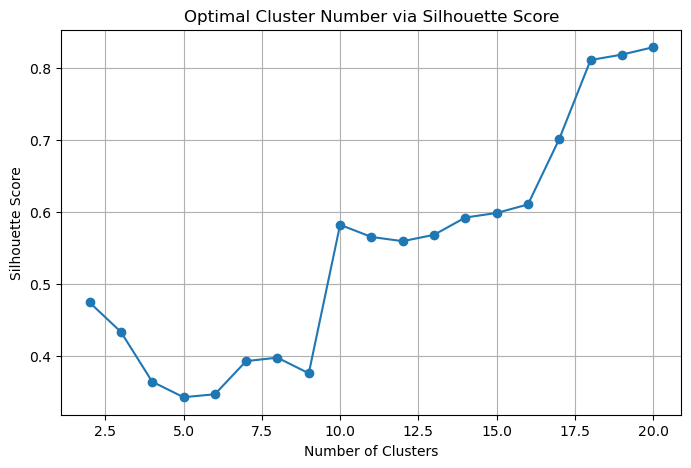

[0.47407380191042703,
 0.4331568340869559,
 0.3639416936715079,
 0.3423913189262297,
 0.34651559976524343,
 0.3925876325750465,
 0.39735301749894675,
 0.3756316761040331,
 0.5819760157687757,
 0.5651213136506998,
 0.559210826291968,
 0.5680588624146227,
 0.5920885920130196,
 0.5983968629298201,
 0.6102989803929249,
 0.7012717513452212,
 0.8109584005817007,
 0.818469405511798,
 0.8287389173475387]

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 转为距离矩阵（因为你用的是相似度）
distance_matrix = 1 - similarity_matrix

# 注意：AgglomerativeClustering 不支持直接传入稀疏矩阵，请确保 distance_matrix 是 dense numpy 数组
if not isinstance(distance_matrix, np.ndarray):
    distance_matrix = distance_matrix.toarray()

scores = []
cluster_range = range(2, 21)  # 尝试聚类数从 2 到 20

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
    labels = model.fit_predict(distance_matrix)
    try:
        score = silhouette_score(distance_matrix, labels, metric='precomputed')
        scores.append(score)
        print(f"n_clusters = {k}, silhouette score = {score:.4f}")
    except Exception as e:
        print(f"n_clusters = {k} failed: {e}")
        scores.append(-1)

# 绘制评分曲线
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Cluster Number via Silhouette Score')
plt.grid(True)
plt.show()

scores


In [11]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
import os

# 设置聚类数（假设你选了最优聚类数 k=12）
n_clusters = 10
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
labels = model.fit_predict(distance_matrix)

# 收集每个类对应的页面索引
cluster_to_indices = defaultdict(list)
for idx, label in enumerate(labels):
    cluster_to_indices[label].append(idx+1)

d:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


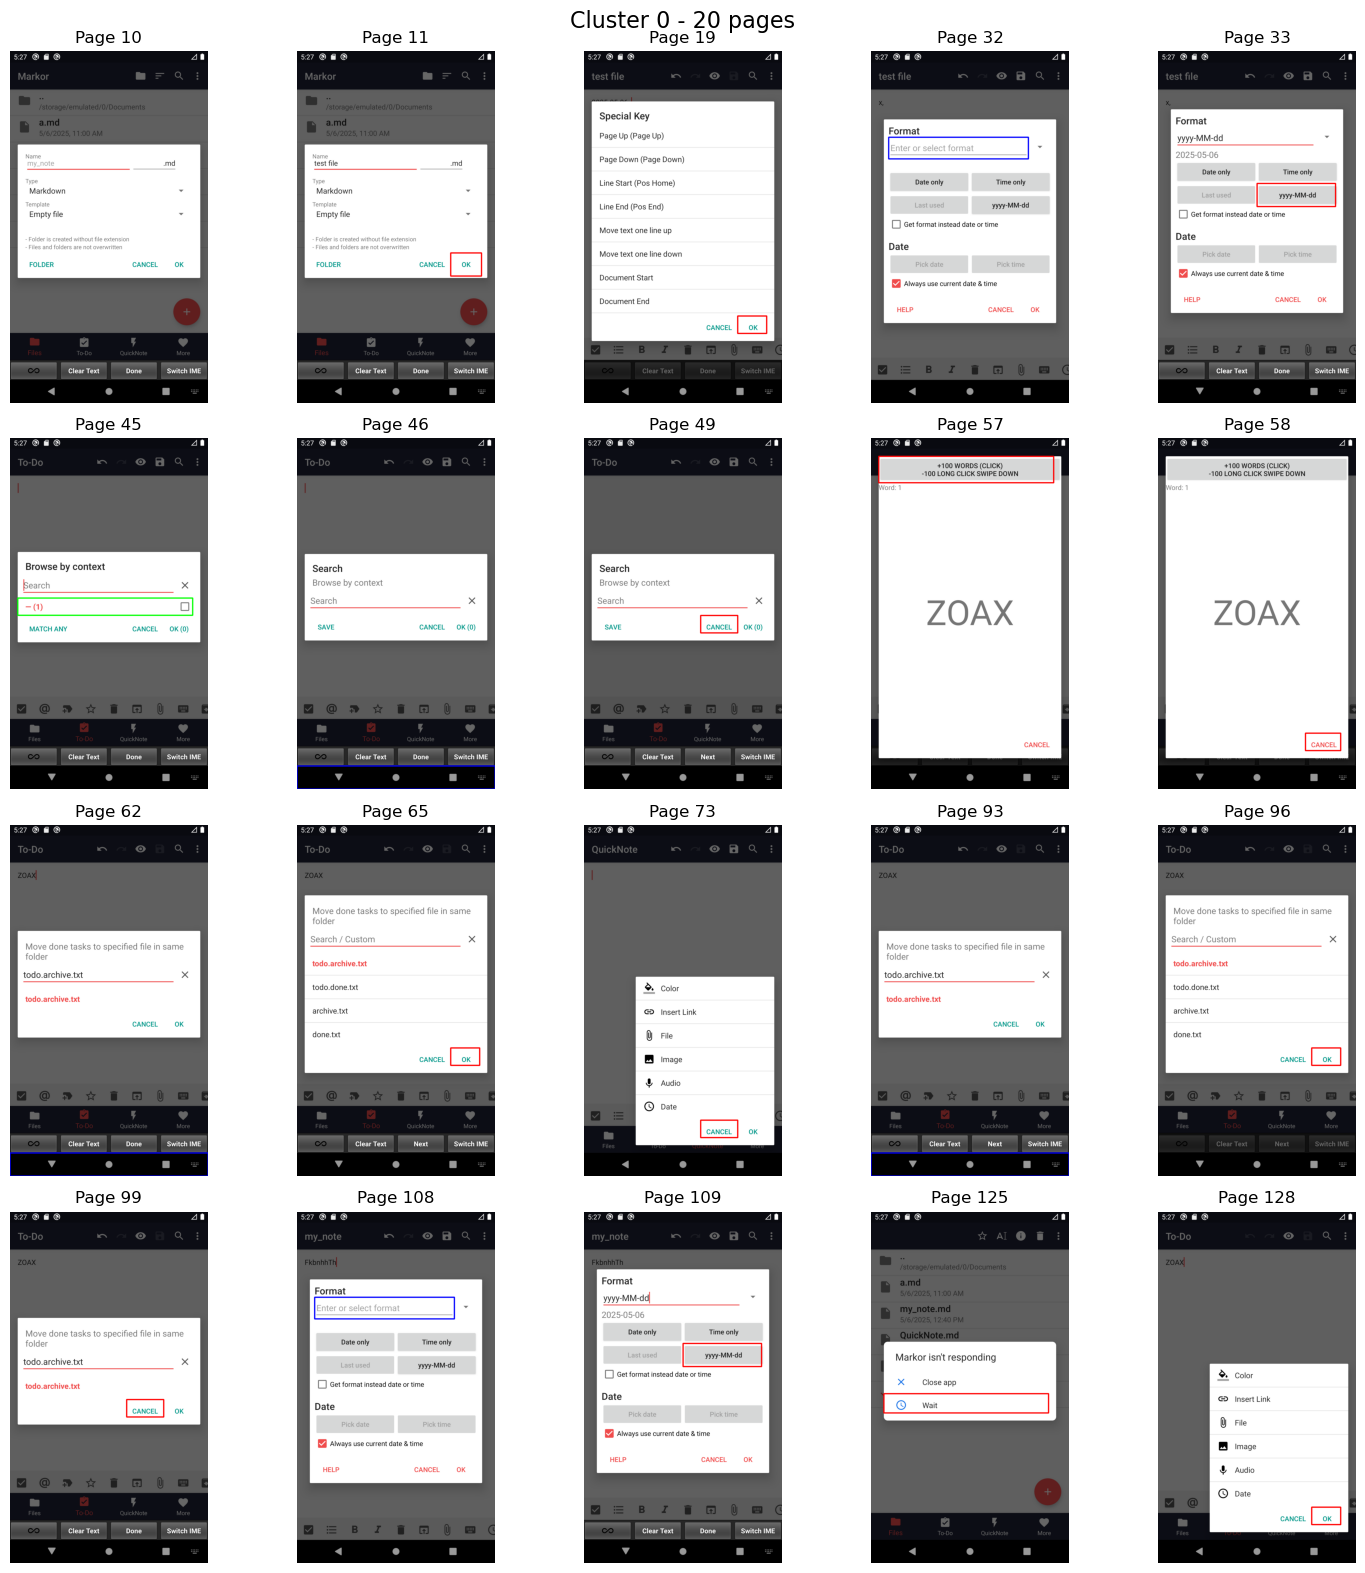

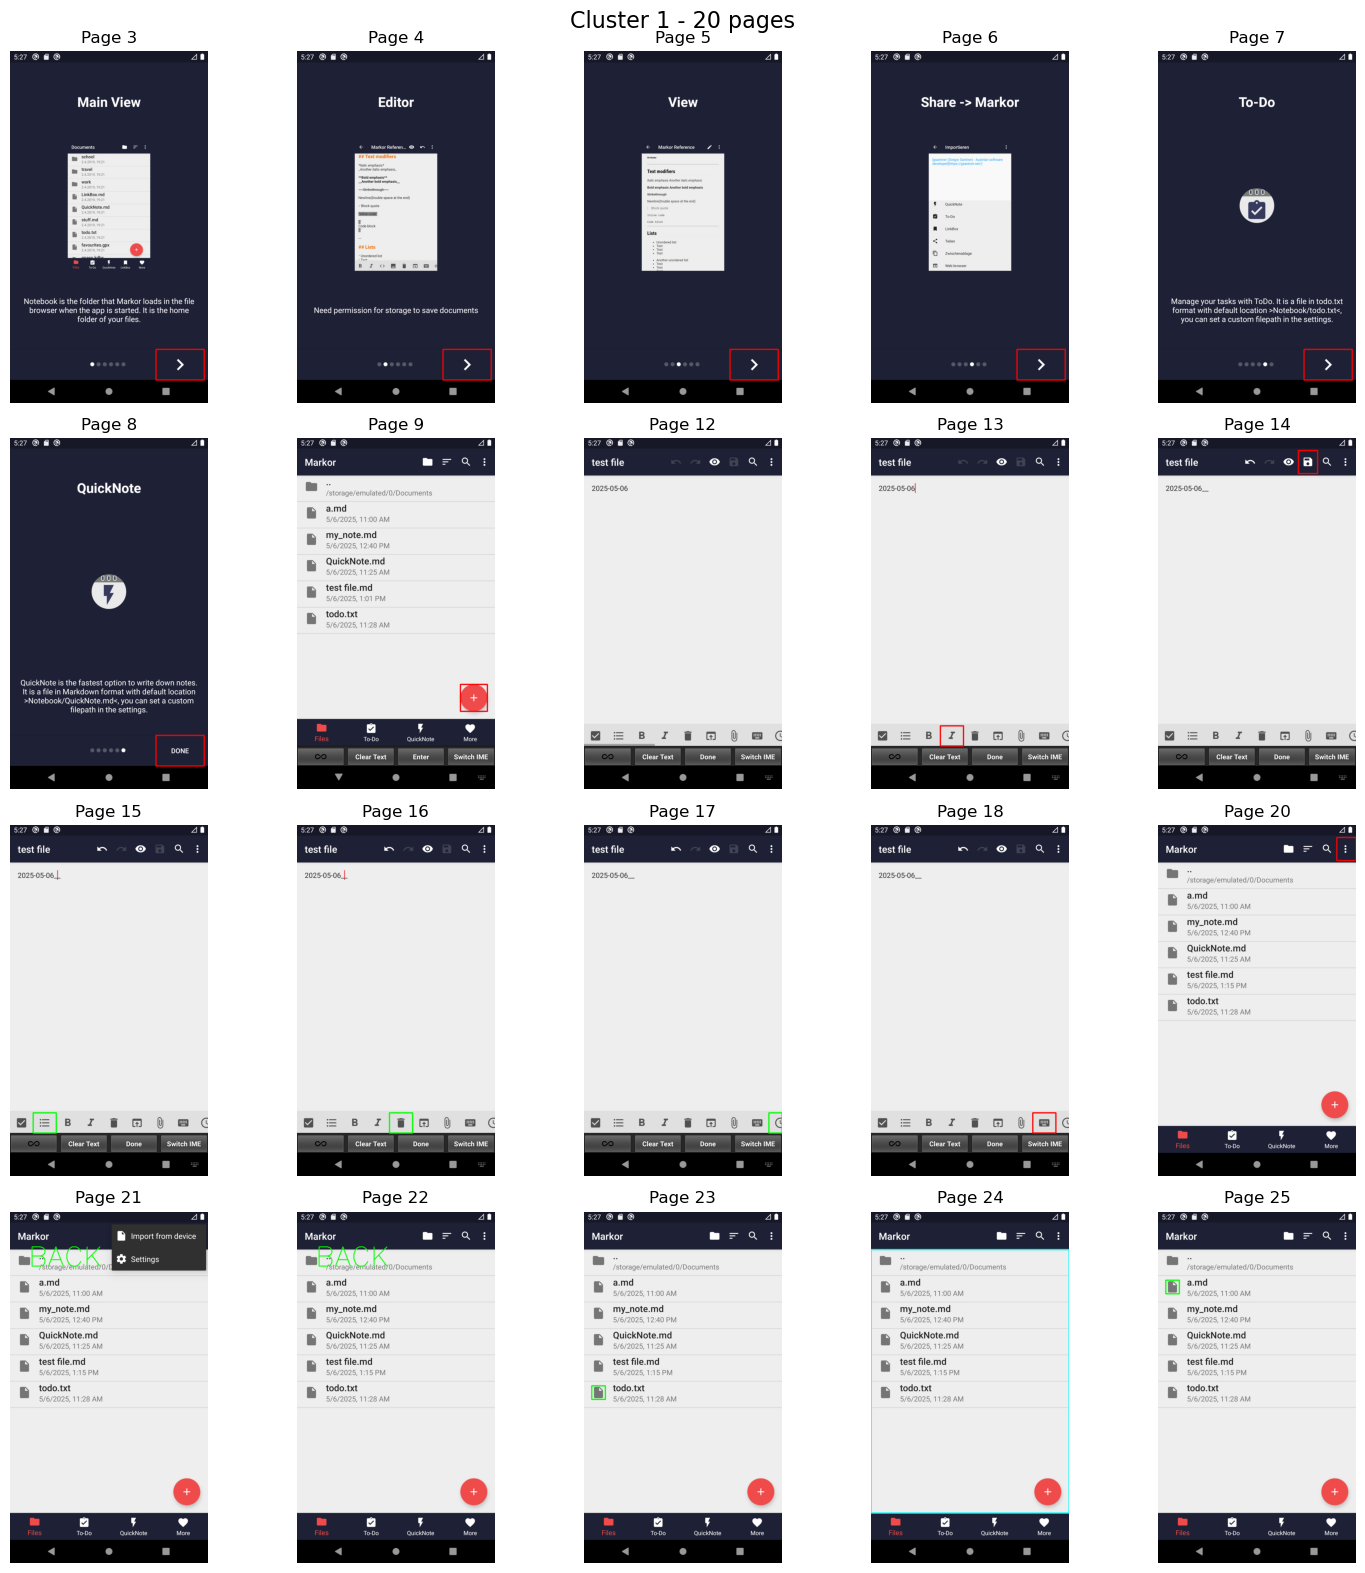

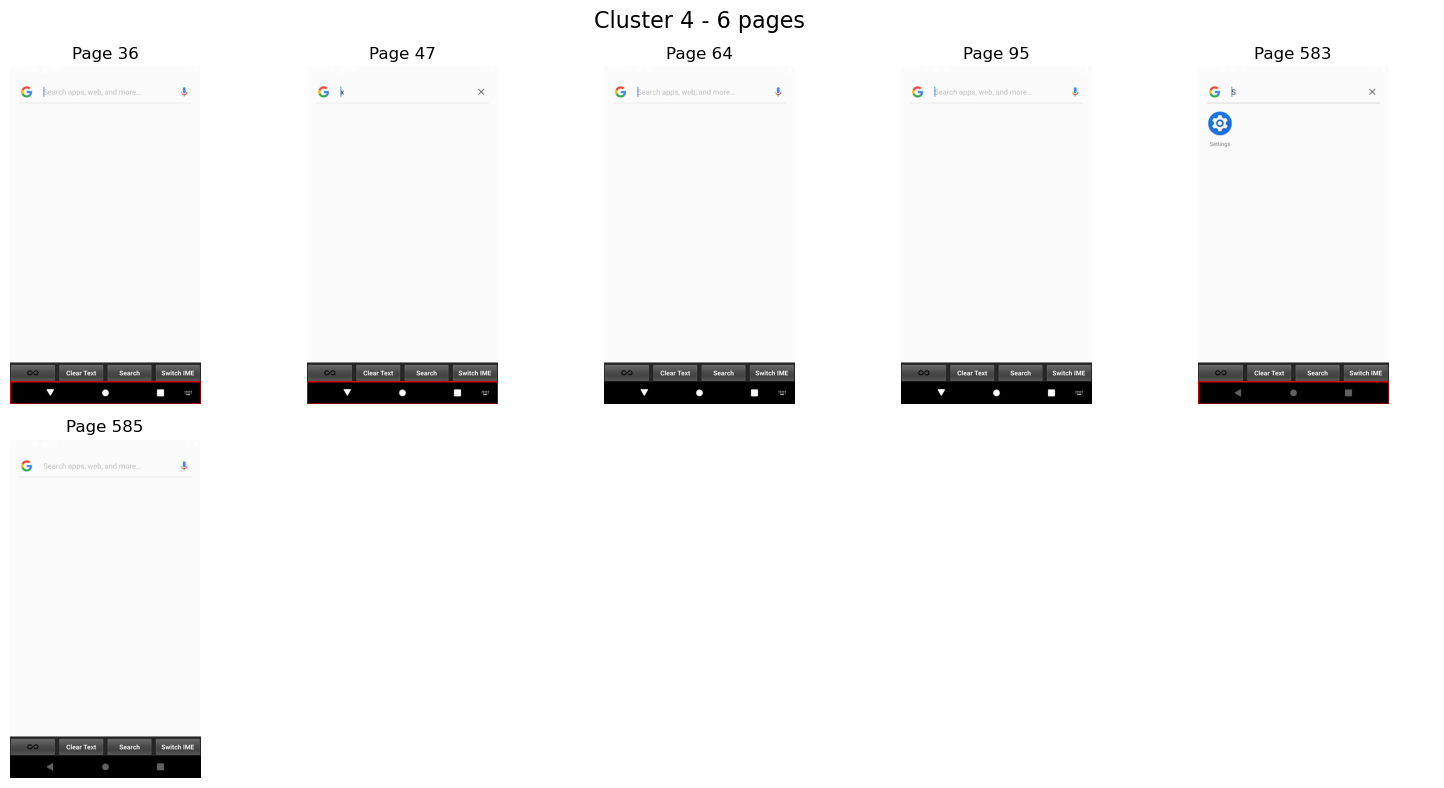

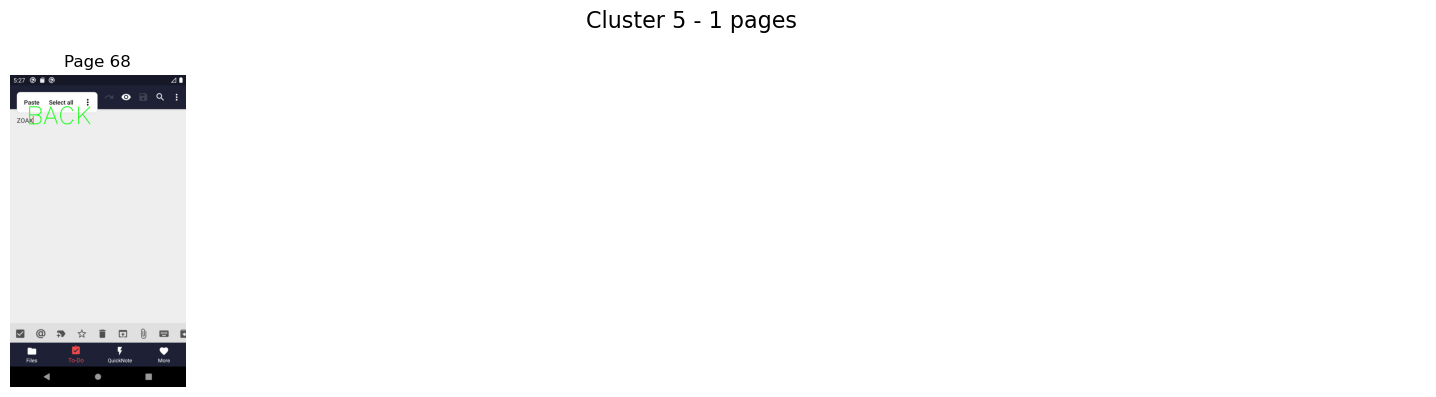

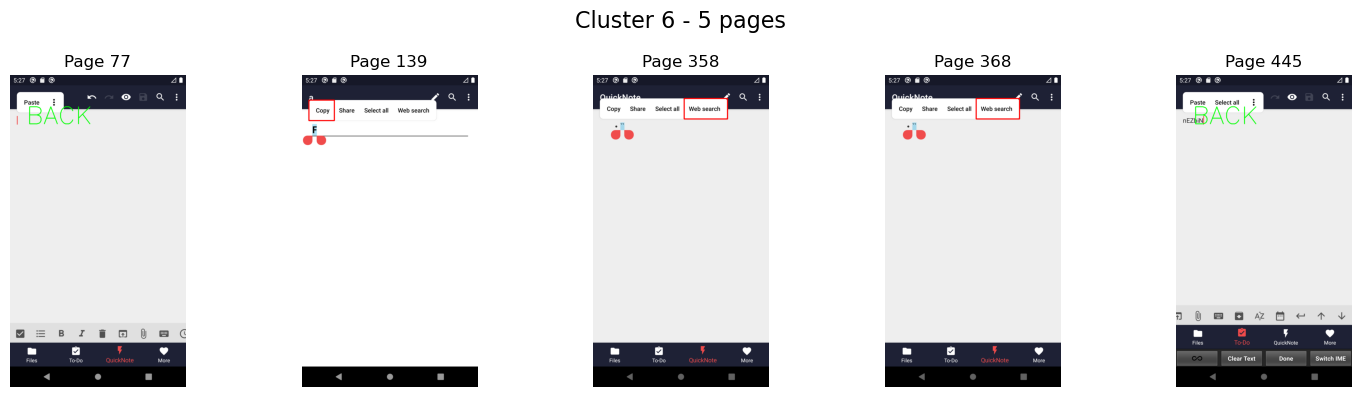

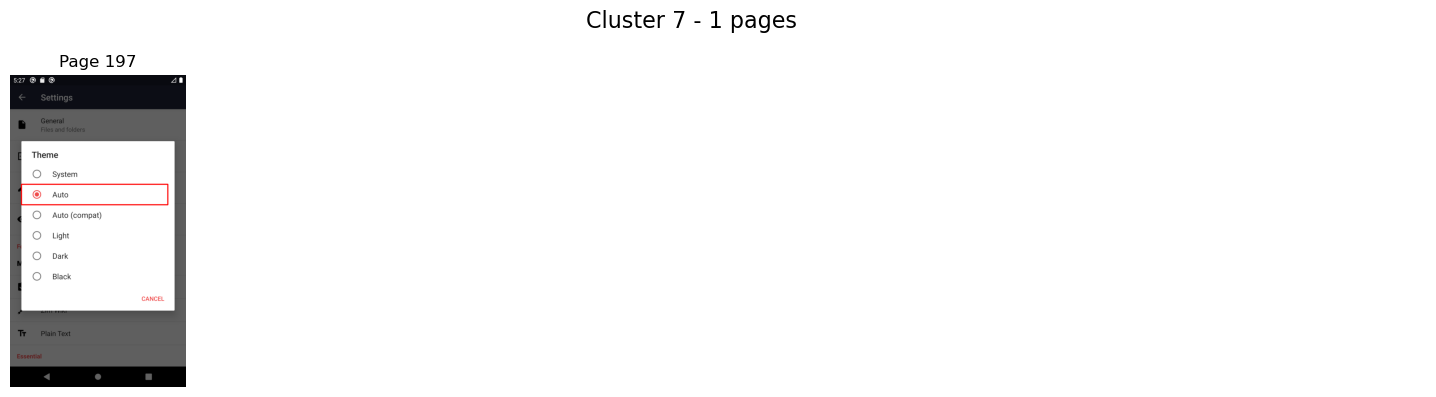

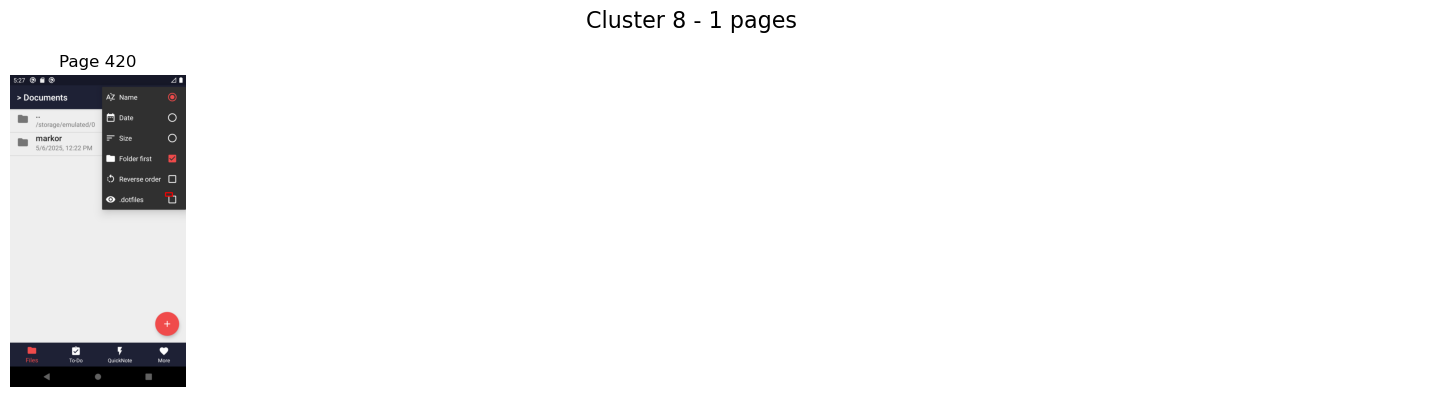

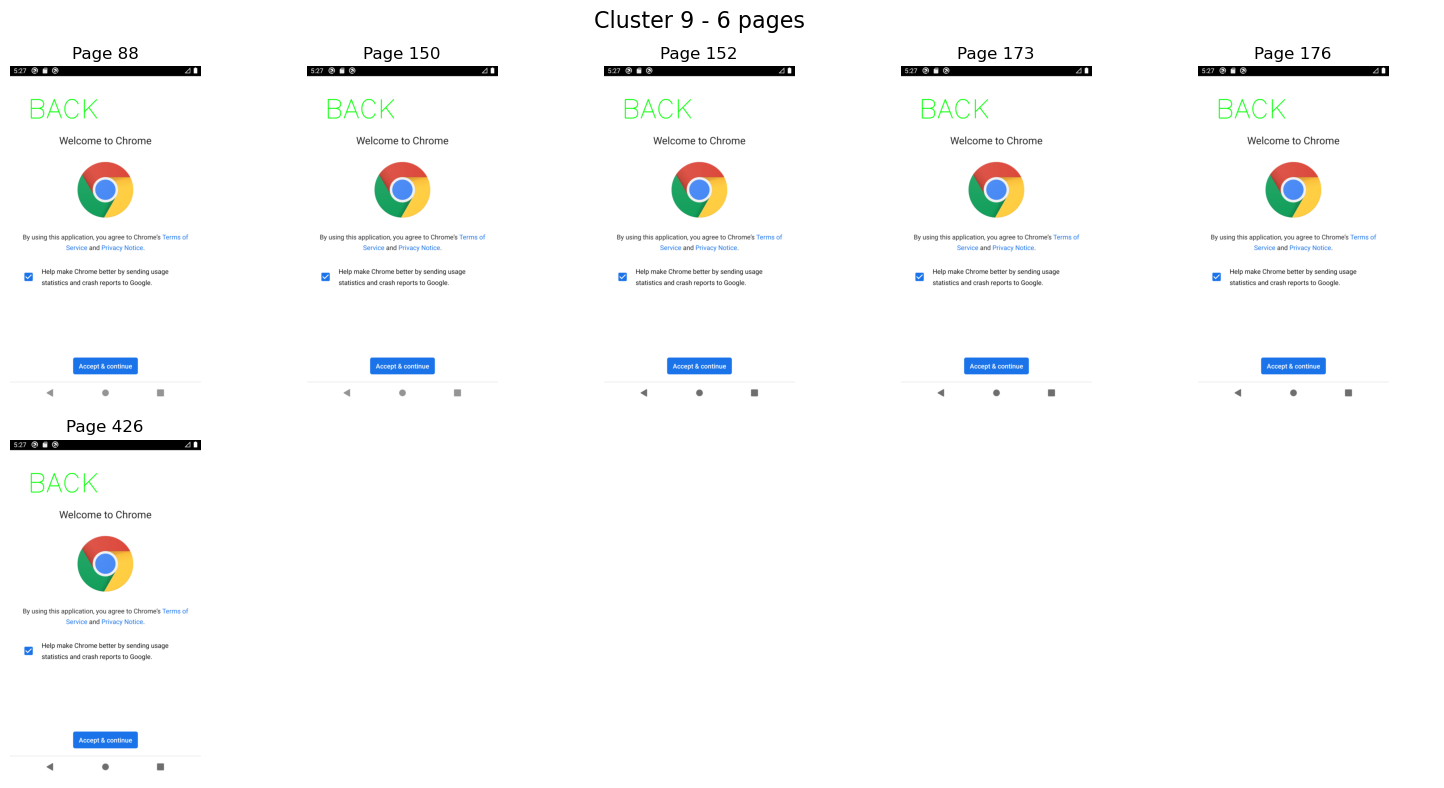

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import math

# 图片文件夹路径
image_dir = root_dir

# 绘制某个簇的图像网格
def show_cluster_images(cluster_id, max_images=20, cols=5):
    indices = cluster_to_indices[cluster_id][:max_images]
    if not indices:
        print(f"No images for cluster {cluster_id}")
        return
    
    rows = math.ceil(len(indices) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
    axs = axs.flatten()

    for ax, idx in zip(axs, indices):
        img_path = os.path.join(image_dir, f"screen_{idx}.png")
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(f"Page {idx}")
        else:
            ax.text(0.5, 0.5, f"Missing\n{idx}", ha='center')
        ax.axis('off')

    for ax in axs[len(indices):]:
        ax.axis('off')

    fig.suptitle(f"Cluster {cluster_id} - {len(indices)} pages", fontsize=16)
    plt.tight_layout()
    plt.show()

for cluster_id in range(n_clusters):
    show_cluster_images(cluster_id)

In [13]:
from PIL import Image
import imagehash
import numpy as np
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from PIL import Image


def showImg(img):
    # 显示图像
    plt.imshow(img, cmap='gray')
    plt.title("Resized Grayscale Image")
    plt.axis('off')
    plt.show()


# 加载截图并计算pHash
img_dir = root_dir
hashes = []

dirs = os.listdir(img_dir)

# 筛选出所有的图片文件，并按编号排序
img_files = [f for f in dirs if f.endswith('.png')]
img_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

for fname in img_files:
    path = os.path.join(img_dir, fname)
    # img = Image.open(path).convert('L').resize((256, 256))
    img = Image.open(path).convert('L').resize((540,960))
    # showImg(img)
    phash = imagehash.phash(img, hash_size=8)
    # print(phash)
    hashes.append(phash.hash.flatten())

# 转换为数组
hash_array = np.array(hashes).astype(int)

print(hash_array)


[[1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 [1 0 0 ... 0 1 1]]


In [14]:
# 聚类（可以试试 DBSCAN）
clustering = DBSCAN(eps=0.15, min_samples=5, metric='hamming').fit(hash_array)
labels = clustering.labels_

label_fname_dict = defaultdict(list)
# 输出聚类结果
for fname, label in zip(img_files, labels):
    # print(f"{fname} -> Cluster {label}")
    label_fname_dict[label].append(fname)

label_fname_dict

print(len(label_fname_dict.keys()))

15


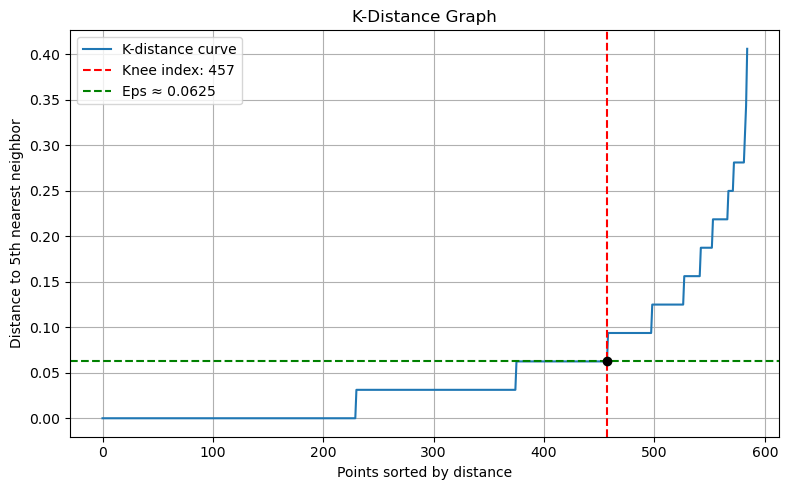

推荐的 eps 值为：0.0625


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def find_knee_point(distances):
    """
    自动查找“拐点”位置。
    """
    n_points = len(distances)
    all_coords = np.vstack((range(n_points), distances)).T

    first_point = all_coords[0]
    last_point = all_coords[-1]
    line_vec = last_point - first_point
    line_vec_norm = line_vec / np.linalg.norm(line_vec)

    vec_from_first = all_coords - first_point
    scalar_proj = np.dot(vec_from_first, line_vec_norm)
    proj = np.outer(scalar_proj, line_vec_norm)
    vec_to_line = vec_from_first - proj

    dist_to_line = np.linalg.norm(vec_to_line, axis=1)
    knee_index = np.argmax(dist_to_line)

    return knee_index, distances[knee_index]


def plot_k_distance_with_knee(data, k=4, metric='hamming', sort=True, title='K-Distance Graph'):
    """
    绘制K距离图，并自动标记拐点。
    """
    # 计算每个点到第k近邻的距离
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(data)
    distances, _ = nbrs.kneighbors(data)
    k_distances = distances[:, -1]

    # 排序
    if sort:
        k_distances = np.sort(k_distances)

    # 查找拐点
    knee_idx, eps_value = find_knee_point(k_distances)

    # 绘图
    plt.figure(figsize=(8, 5))
    plt.plot(k_distances, label='K-distance curve')
    plt.axvline(x=knee_idx, color='red', linestyle='--', label=f'Knee index: {knee_idx}')
    plt.axhline(y=eps_value, color='green', linestyle='--', label=f'Eps ≈ {eps_value:.4f}')
    plt.scatter(knee_idx, eps_value, color='black', zorder=5)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"Distance to {k}th nearest neighbor")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return eps_value

eps = plot_k_distance_with_knee(hash_array,5)
print(f"推荐的 eps 值为：{eps:.4f}")

0
['screen_1.png', 'screen_2.png', 'screen_35.png', 'screen_37.png', 'screen_48.png', 'screen_63.png', 'screen_94.png', 'screen_113.png', 'screen_129.png', 'screen_433.png', 'screen_528.png', 'screen_584.png']


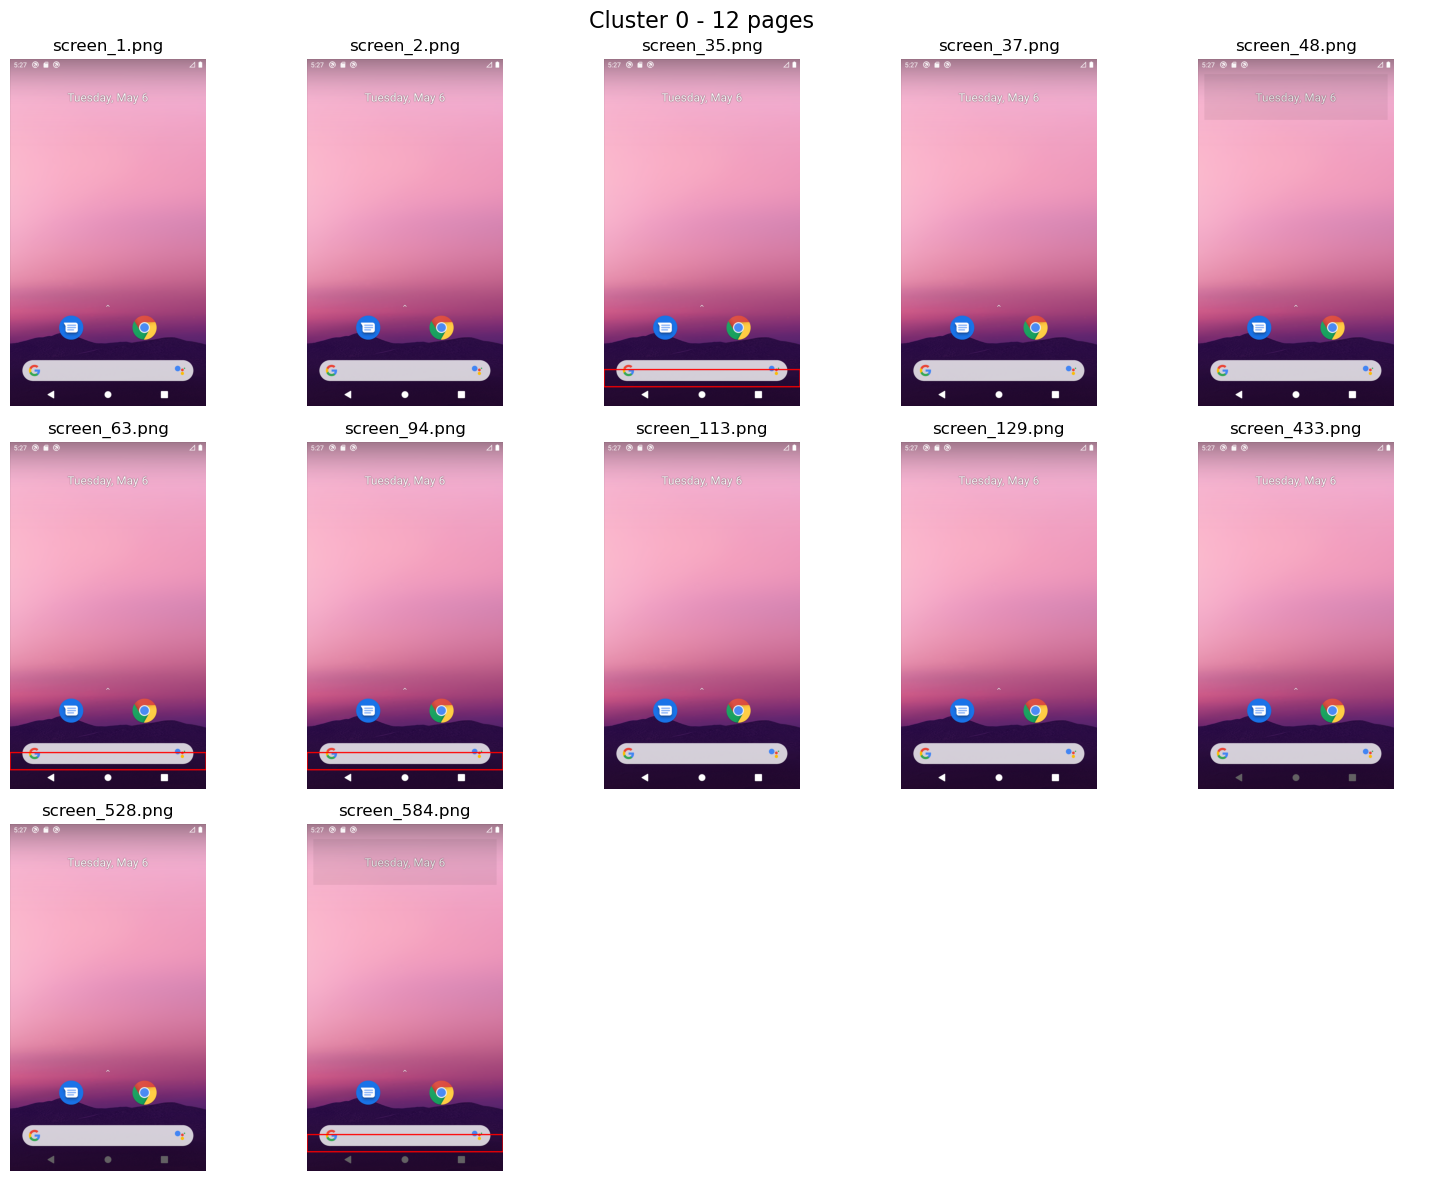

1
['screen_9.png', 'screen_20.png', 'screen_22.png', 'screen_23.png', 'screen_24.png', 'screen_25.png', 'screen_26.png', 'screen_42.png', 'screen_101.png', 'screen_102.png', 'screen_112.png', 'screen_114.png', 'screen_115.png', 'screen_116.png', 'screen_117.png', 'screen_118.png', 'screen_119.png', 'screen_120.png', 'screen_121.png', 'screen_122.png']


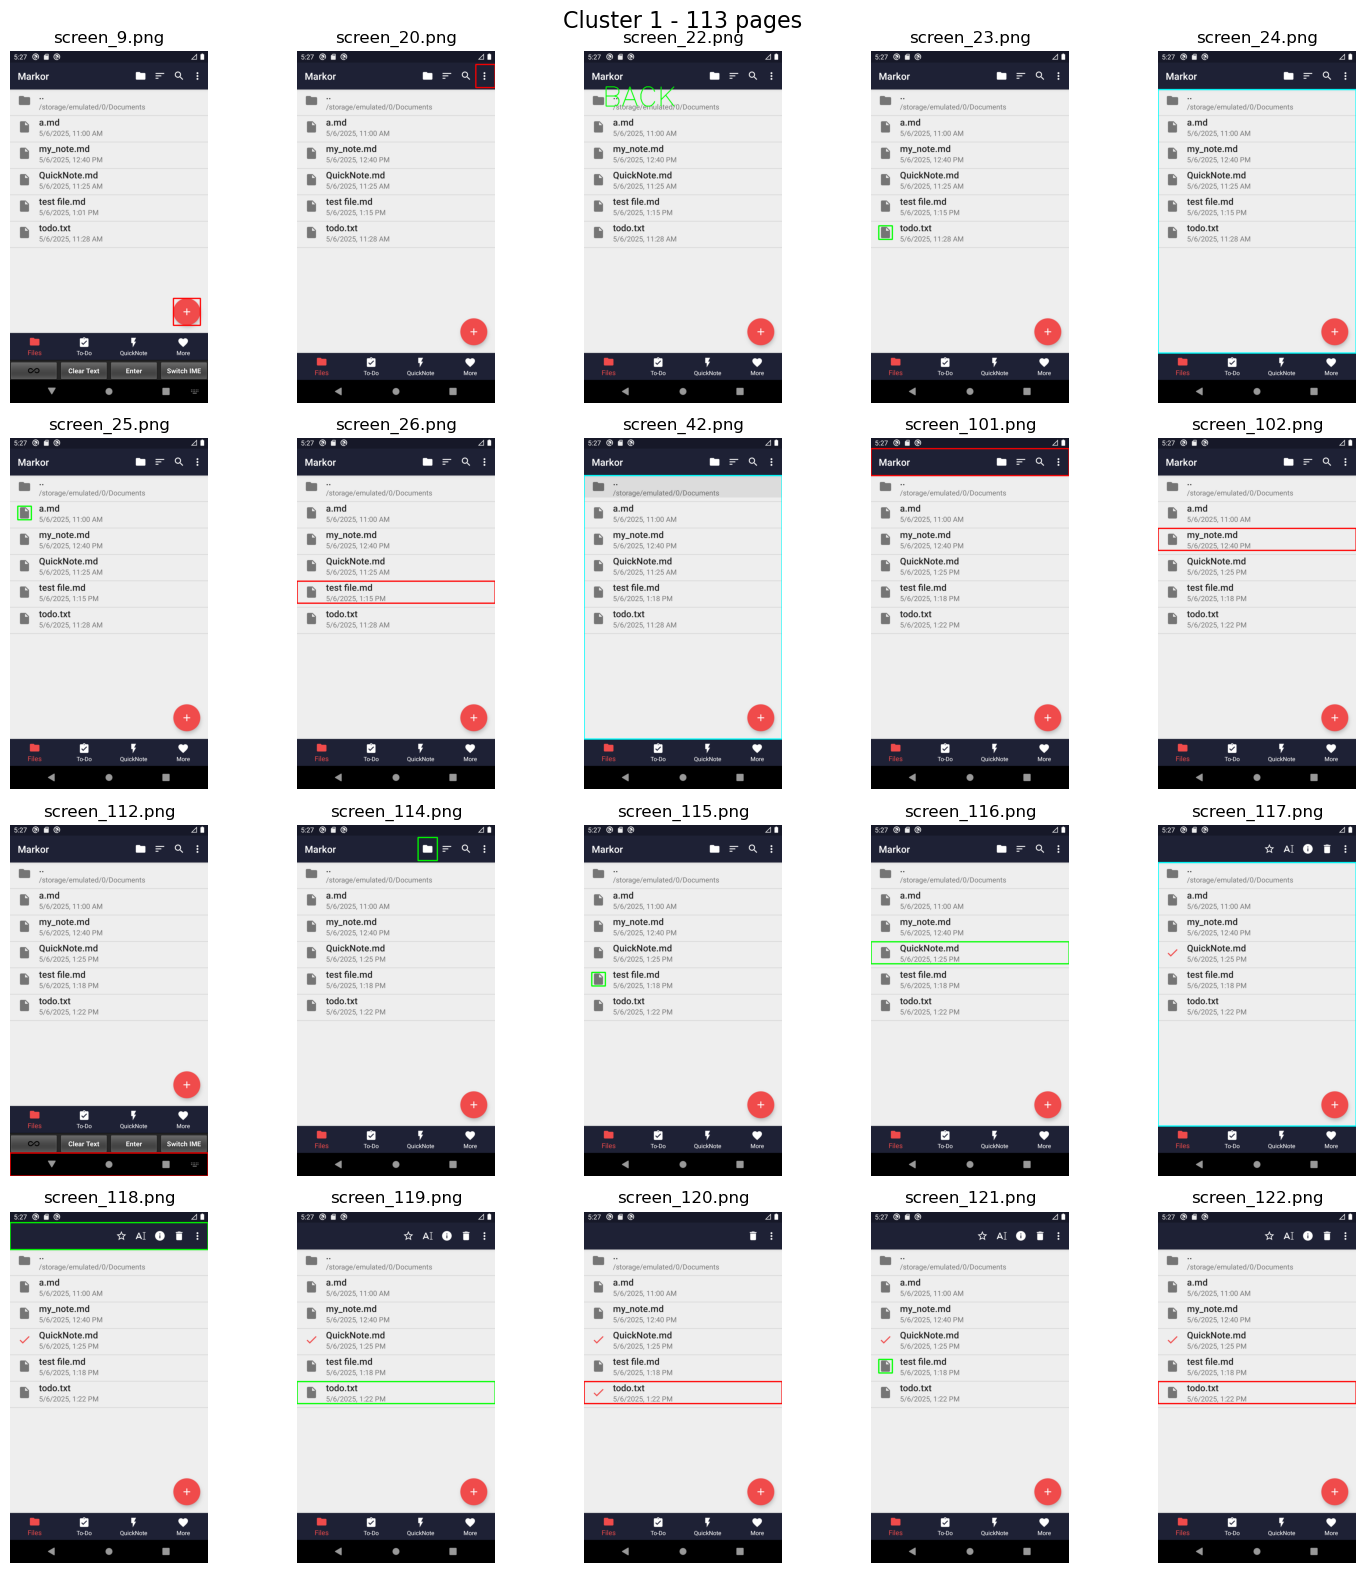

2
['screen_10.png', 'screen_11.png', 'screen_65.png', 'screen_96.png', 'screen_159.png', 'screen_160.png', 'screen_161.png', 'screen_163.png', 'screen_266.png', 'screen_573.png', 'screen_574.png']


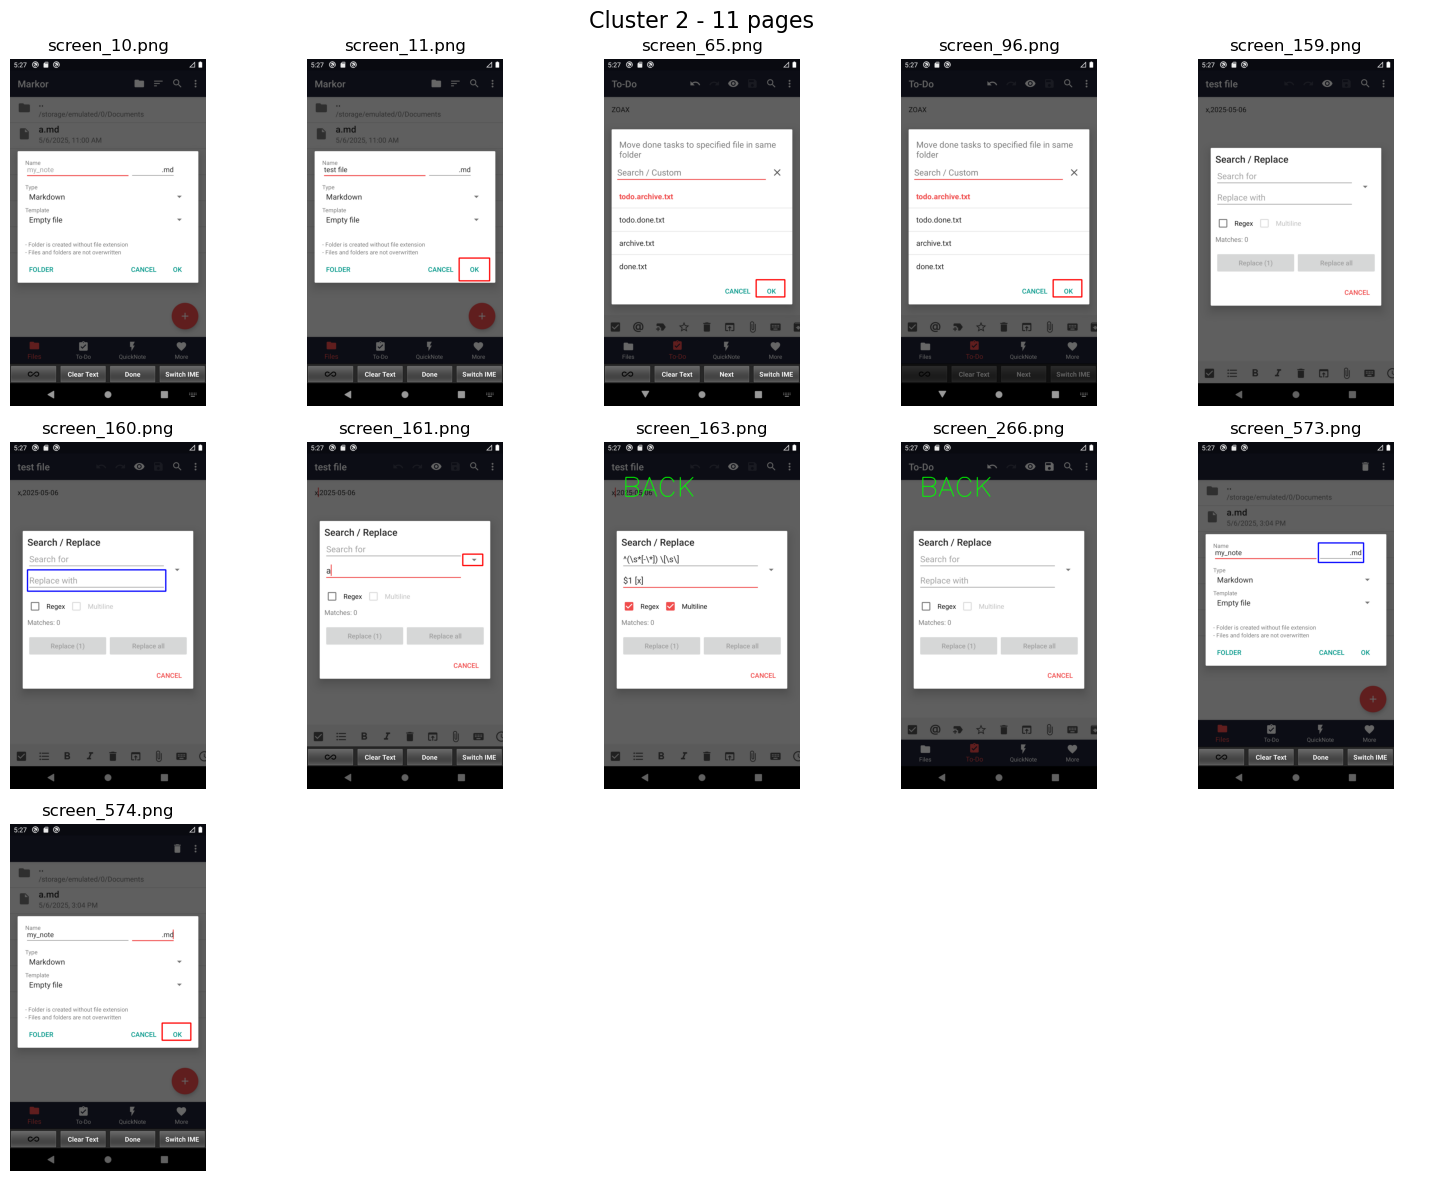

3
['screen_12.png', 'screen_13.png', 'screen_14.png', 'screen_15.png', 'screen_16.png', 'screen_17.png', 'screen_18.png', 'screen_27.png', 'screen_28.png', 'screen_29.png', 'screen_30.png', 'screen_31.png', 'screen_34.png', 'screen_38.png', 'screen_39.png', 'screen_40.png', 'screen_41.png', 'screen_43.png', 'screen_44.png', 'screen_50.png']


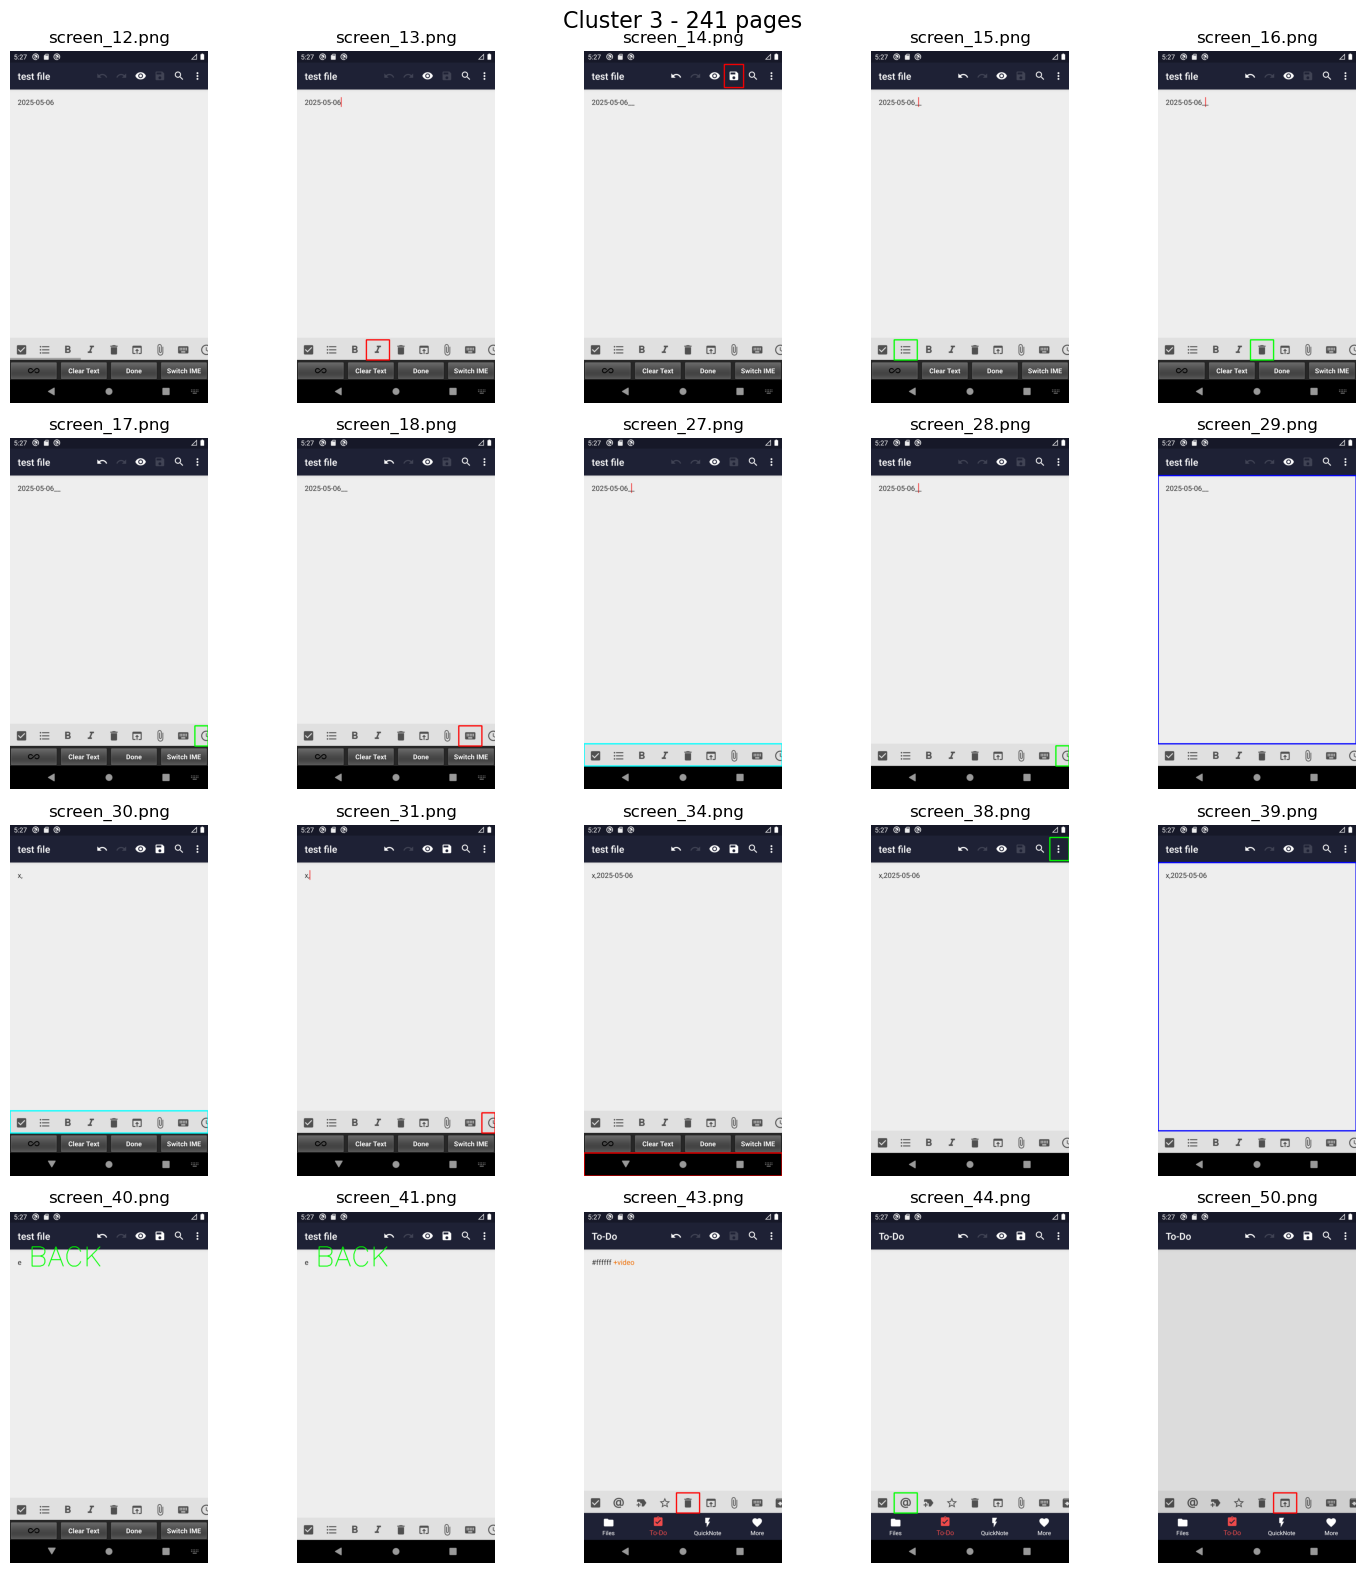

4
['screen_36.png', 'screen_47.png', 'screen_64.png', 'screen_95.png', 'screen_585.png']


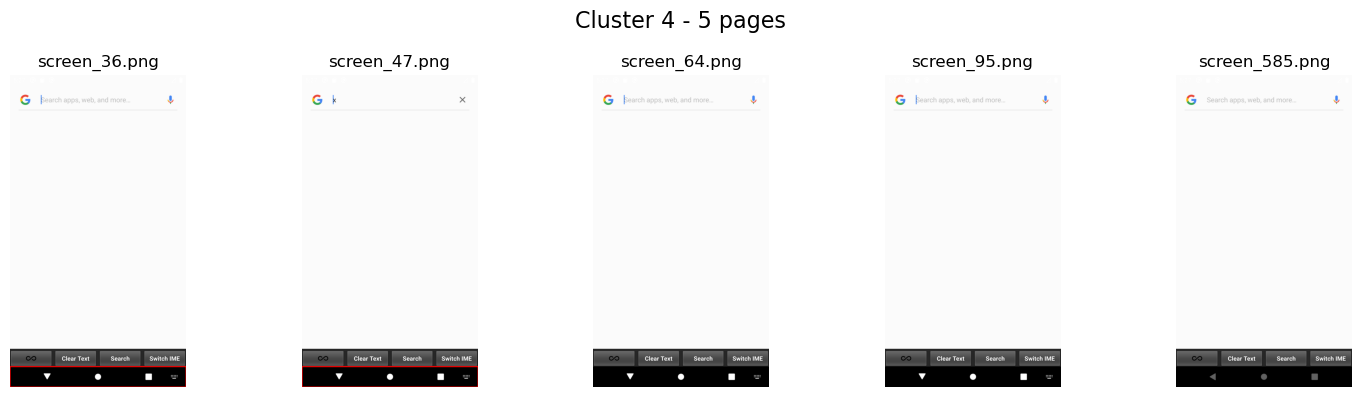

5
['screen_45.png', 'screen_46.png', 'screen_49.png', 'screen_62.png', 'screen_93.png', 'screen_99.png', 'screen_125.png', 'screen_158.png', 'screen_254.png', 'screen_261.png', 'screen_265.png', 'screen_296.png', 'screen_344.png', 'screen_443.png', 'screen_579.png', 'screen_580.png']


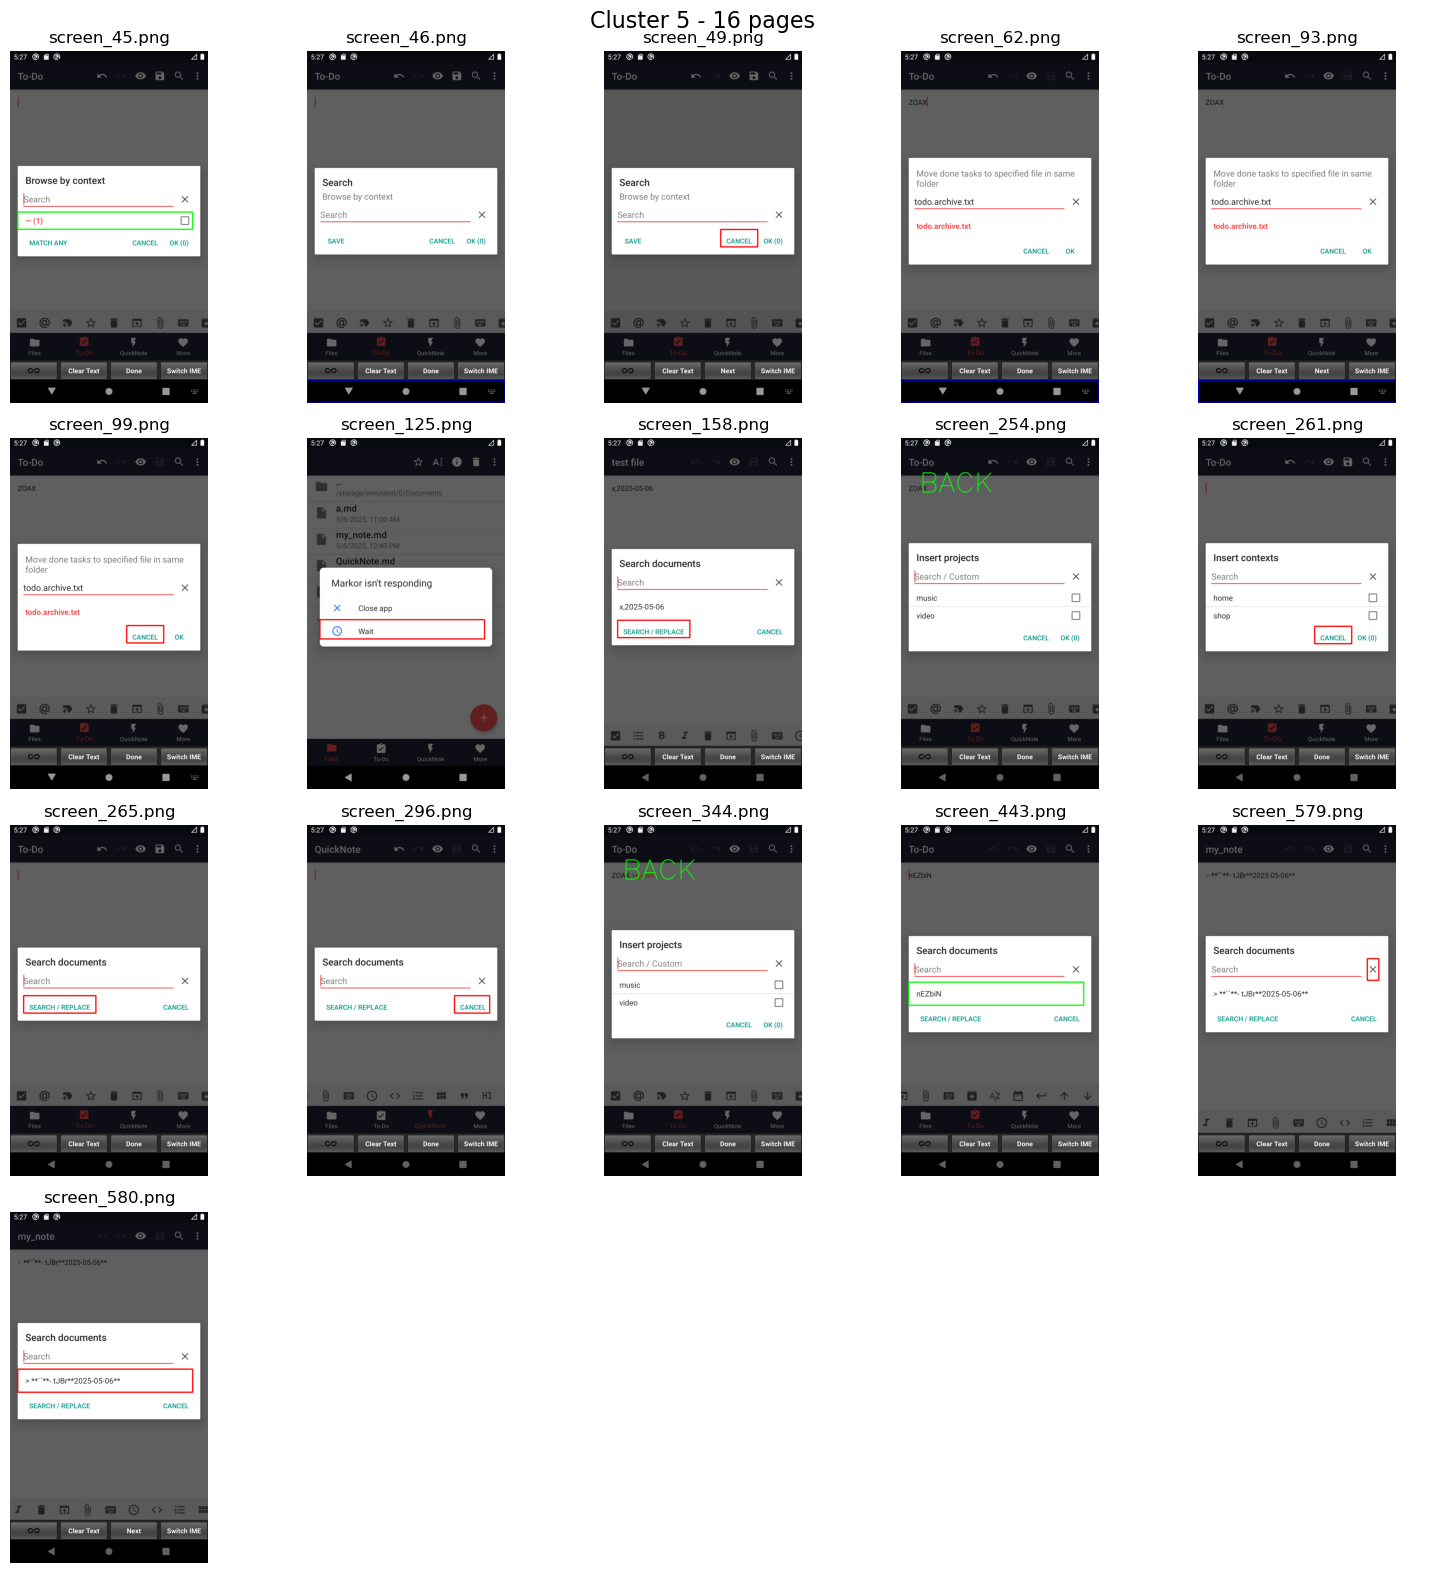

6
['screen_55.png', 'screen_337.png', 'screen_341.png', 'screen_362.png', 'screen_420.png']


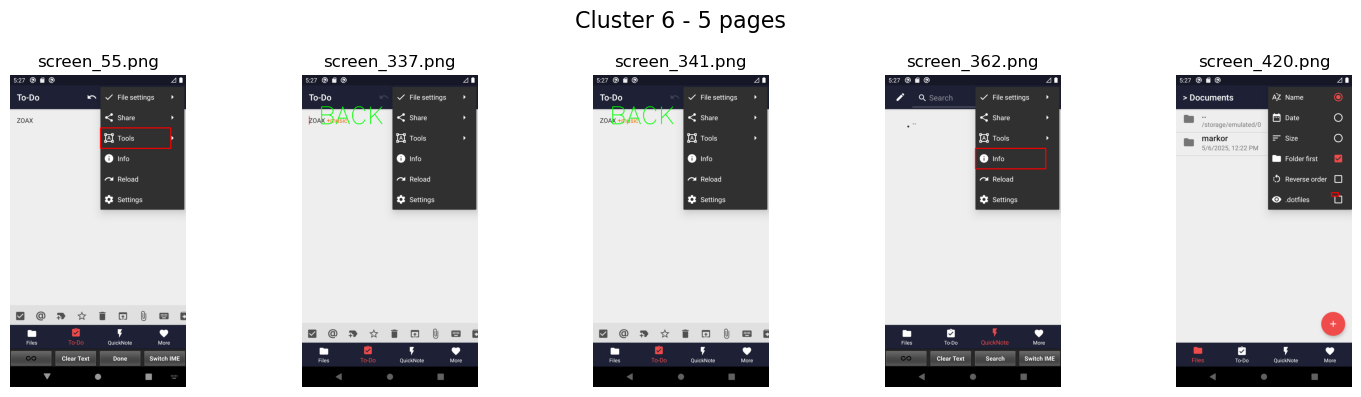

7
['screen_73.png', 'screen_128.png', 'screen_221.png', 'screen_286.png', 'screen_432.png', 'screen_555.png']


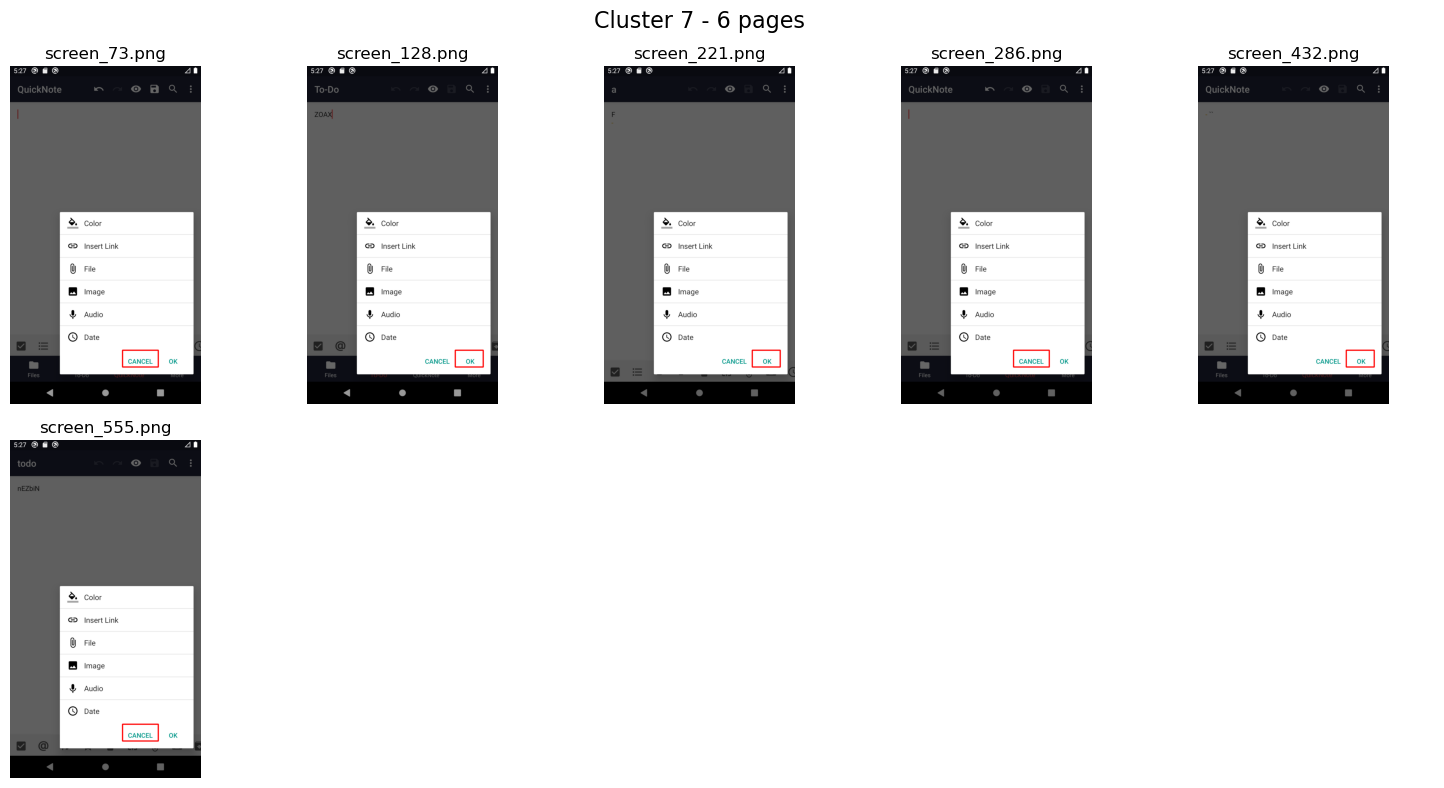

8
['screen_88.png', 'screen_150.png', 'screen_152.png', 'screen_173.png', 'screen_176.png', 'screen_426.png']


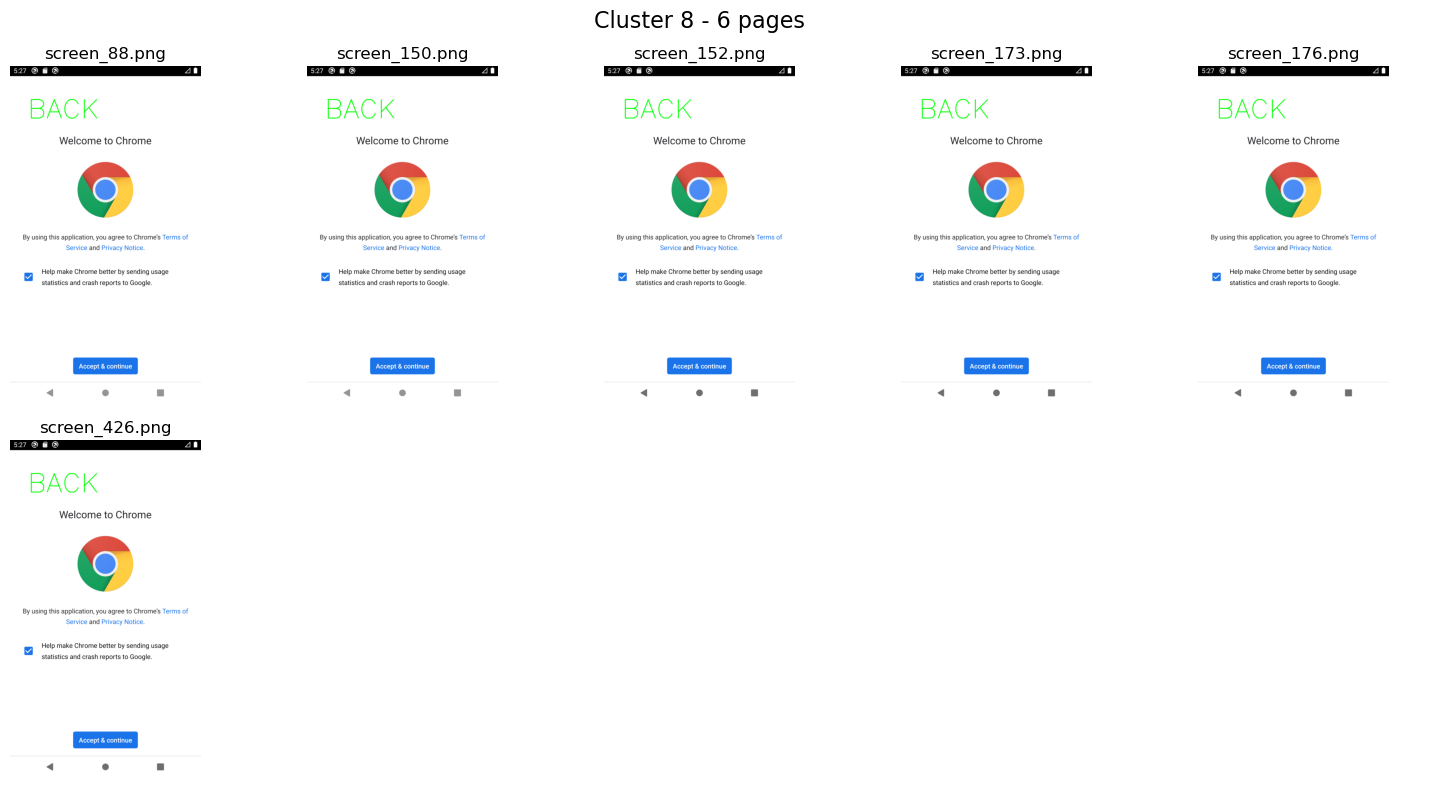

9
['screen_135.png', 'screen_136.png', 'screen_224.png', 'screen_241.png', 'screen_544.png']


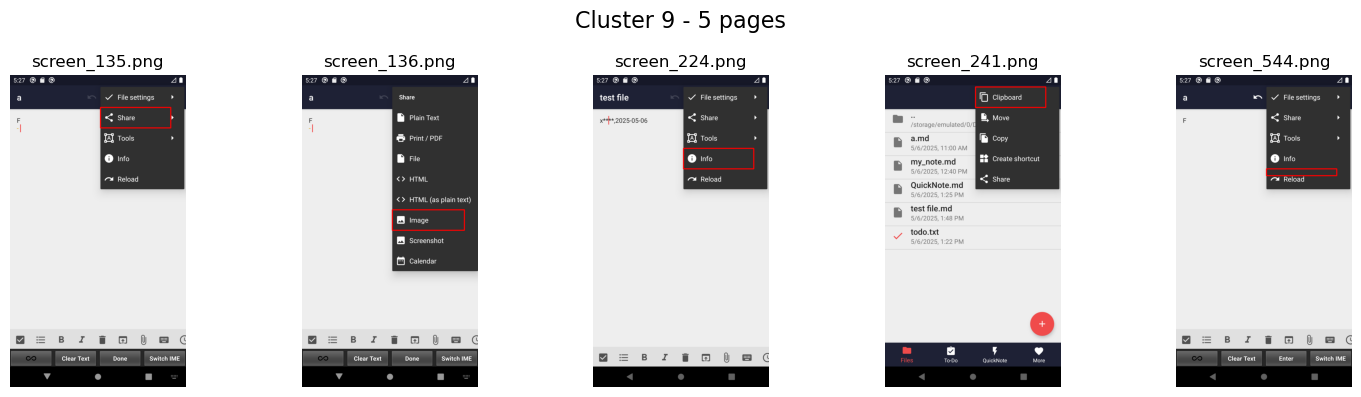

10
['screen_139.png', 'screen_141.png', 'screen_215.png', 'screen_216.png', 'screen_217.png', 'screen_358.png', 'screen_368.png', 'screen_371.png', 'screen_372.png', 'screen_373.png', 'screen_374.png', 'screen_375.png', 'screen_376.png', 'screen_377.png', 'screen_378.png', 'screen_379.png', 'screen_380.png', 'screen_381.png', 'screen_382.png', 'screen_383.png']


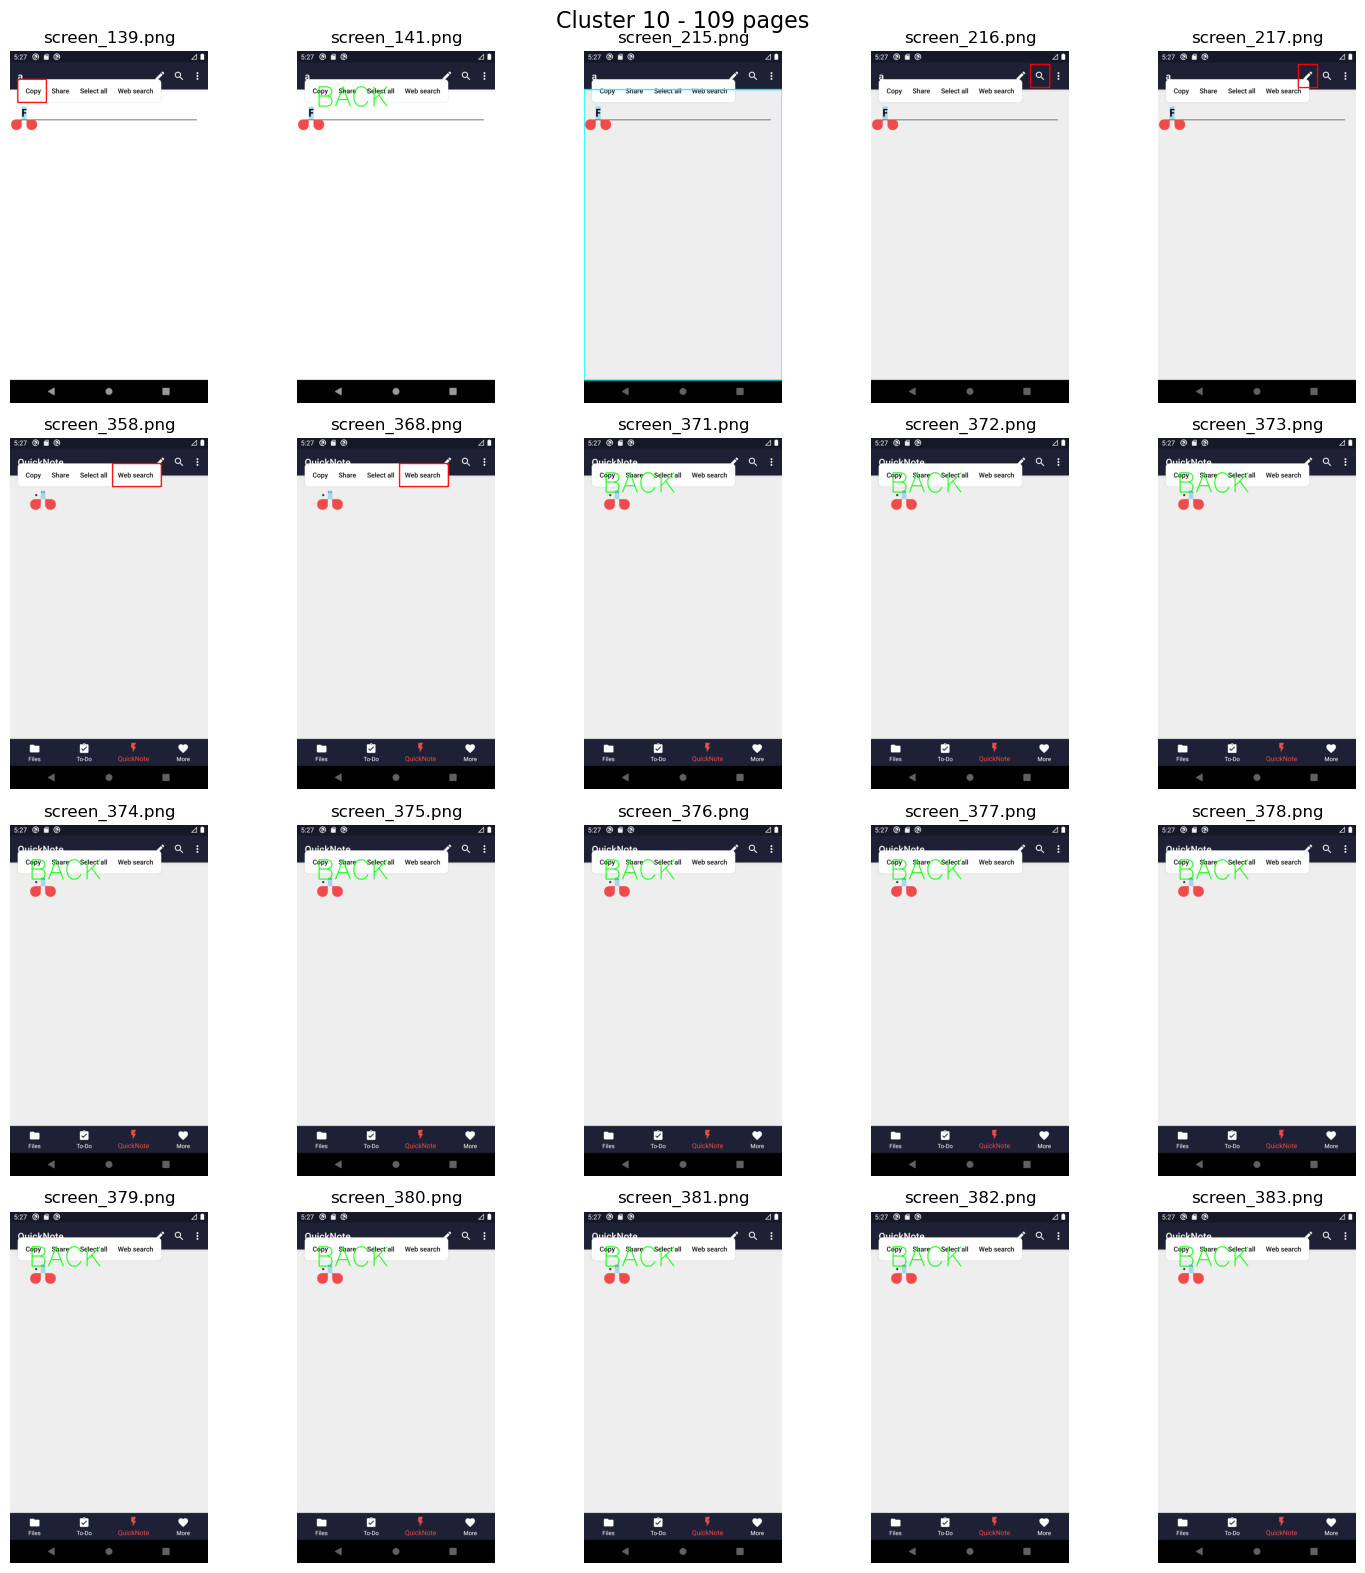

11
['screen_277.png', 'screen_278.png', 'screen_279.png', 'screen_280.png', 'screen_281.png']


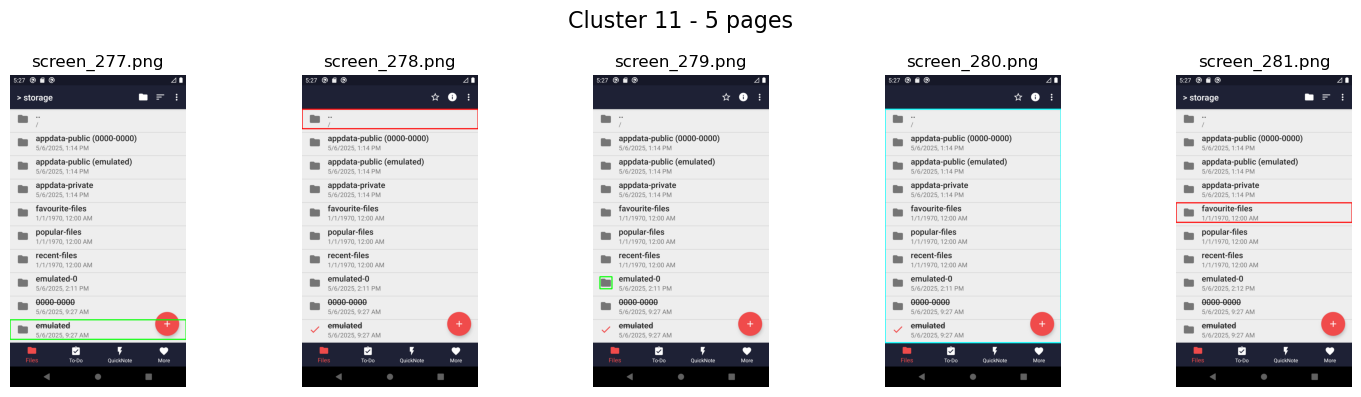

12
['screen_306.png', 'screen_307.png', 'screen_308.png', 'screen_309.png', 'screen_310.png', 'screen_311.png']


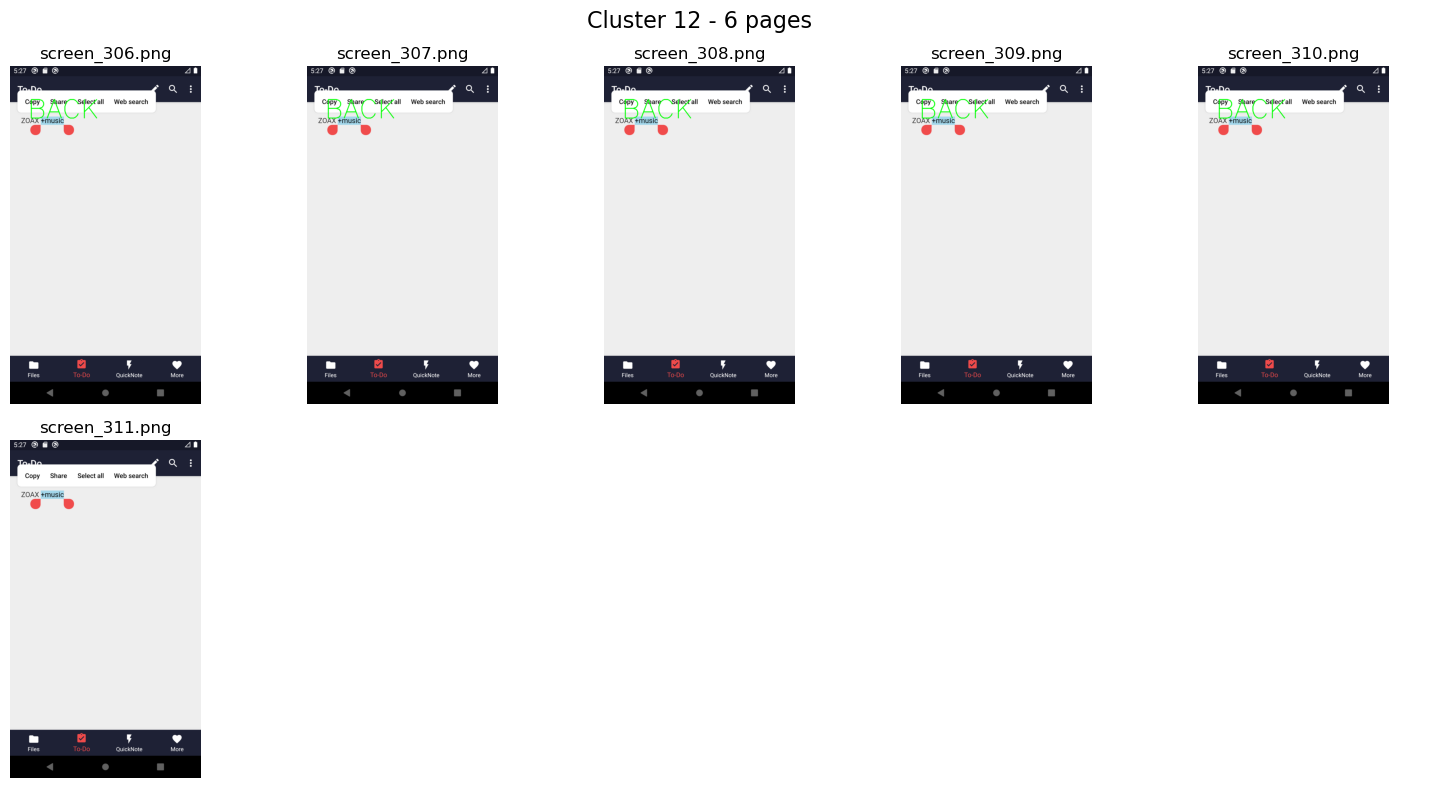

13
['screen_19.png', 'screen_205.png', 'screen_225.png', 'screen_363.png', 'screen_527.png']


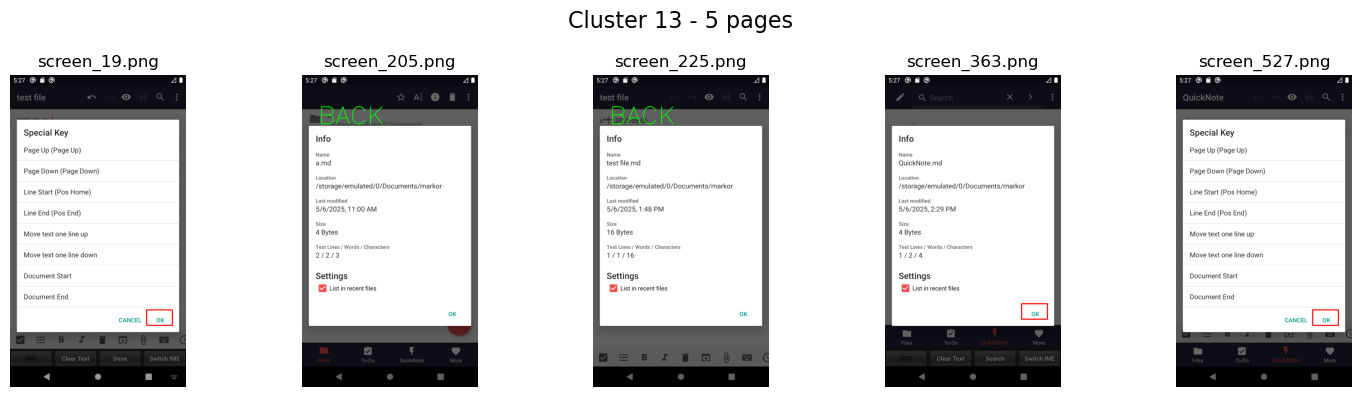

-1
['screen_3.png', 'screen_4.png', 'screen_5.png', 'screen_6.png', 'screen_7.png', 'screen_8.png', 'screen_21.png', 'screen_32.png', 'screen_33.png', 'screen_56.png', 'screen_57.png', 'screen_58.png', 'screen_68.png', 'screen_108.png', 'screen_109.png', 'screen_137.png', 'screen_162.png', 'screen_184.png', 'screen_185.png', 'screen_186.png']


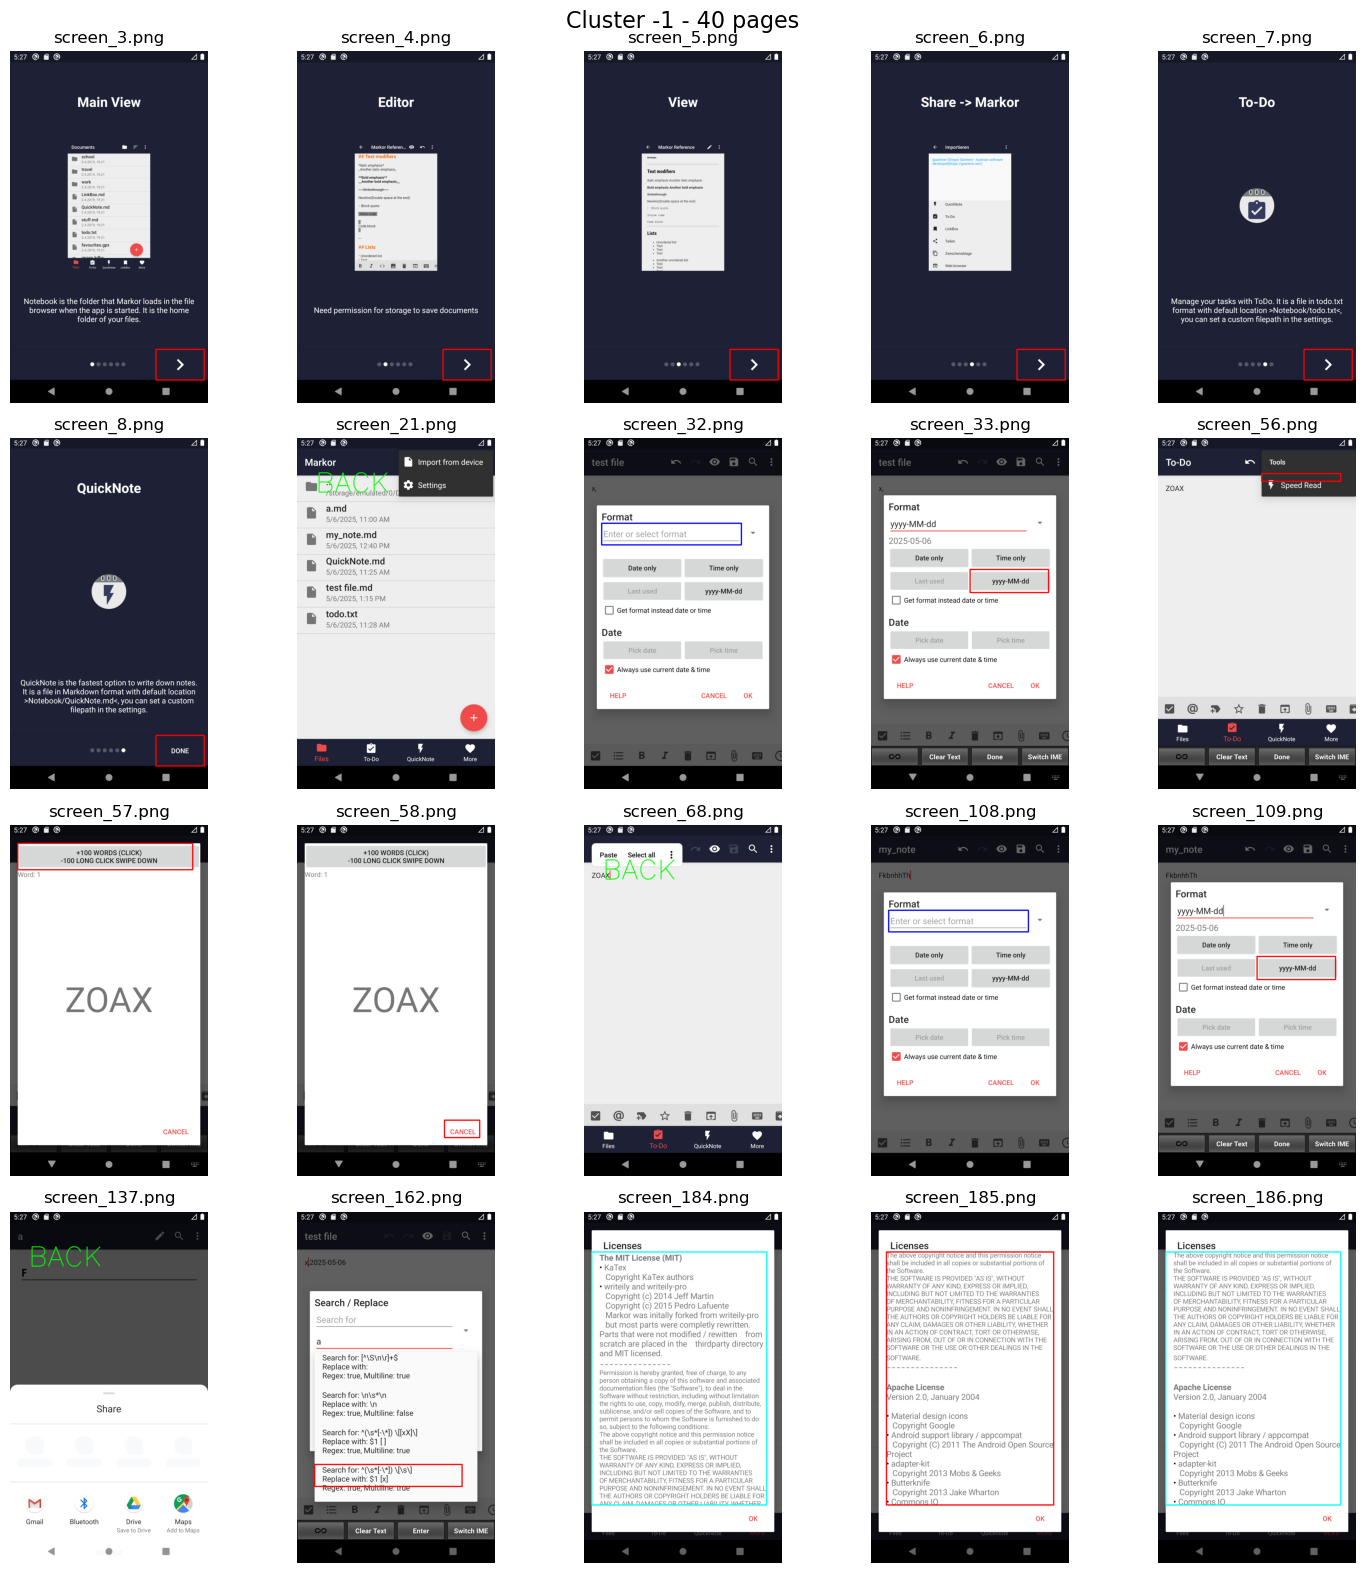

In [16]:
# 绘制某个簇的图像网格
def show_cluster_images(label, max_images=20, cols=5):
    fnames = label_fname_dict[label][:max_images]

    print(fnames)


    if not fnames:
        print(f"No images for cluster {label}")
        return
    
    rows = math.ceil(len(fnames) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
    axs = axs.flatten()

    for ax, fname in zip(axs, fnames):
        img_path = os.path.join(image_dir, fname)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(fname)
        else:
            pass
            ax.text(0.5, 0.5, f"Missing{fname}", ha='center')
        ax.axis('off')

    for ax in axs[len(fnames):]:
        ax.axis('off')

    fig.suptitle(f"Cluster {cluster_id} - {len(label_fname_dict[label])} pages", fontsize=16)
    plt.tight_layout()
    plt.show()

# 绘制网格图
for cluster_id in set(labels):
    print(cluster_id)
    show_cluster_images(cluster_id)

In [17]:
num_pages = activities_count
structure_labels = [-1] * num_pages  # -1 表示未分配（可选）

for cluster_id, page_indices in cluster_to_indices.items():
    for idx in page_indices:
        structure_labels[idx-1] = cluster_id  # 页面索引从1开始，列表从0开始

image_labels = [-1] * num_pages # 图像相似度聚类，每个页面对应一个簇编号
for cluster_id, fnames in label_fname_dict.items():
    for fname in fnames:
        idx = (int)(fname.split(".")[0].split("_")[-1])
        image_labels[idx-1] = cluster_id  # 页面索引从1开始，列表从0开始

print(structure_labels)
print(image_labels)


[2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 4, 0, 1, 1, 5, 1, 1, 1, 1, 0, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 0, 2, 4, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 9, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

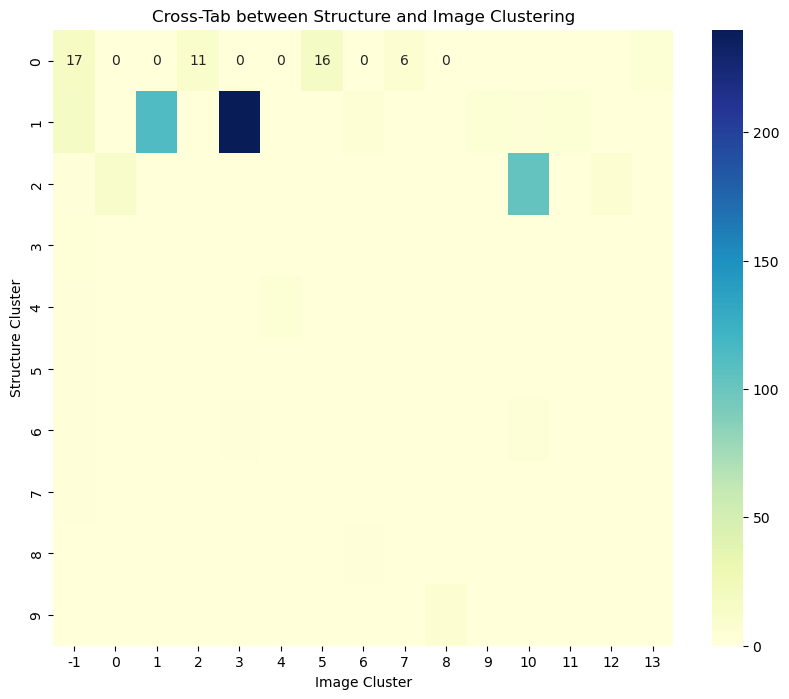

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(structure_labels, image_labels):
    df = pd.crosstab(pd.Series(structure_labels, name="Structure Cluster"),
                     pd.Series(image_labels, name="Image Cluster"))

    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Cross-Tab between Structure and Image Clustering")
    plt.show()

plot_confusion_matrix(structure_labels,image_labels)

In [19]:
from collections import defaultdict, Counter

def analyze_cluster_mapping(src_labels, tgt_labels):
    mapping = defaultdict(list)
    for idx, src in enumerate(src_labels):
        mapping[src].append(tgt_labels[idx])

    for src_cluster, tgt_list in mapping.items():
        tgt_counter = Counter(tgt_list)
        print(f"结构类 {src_cluster}: 对应图像类分布: {dict(tgt_counter)}")

def analyze_cluster_mapping2(src_labels, tgt_labels):
    mapping = defaultdict(list)
    for idx, src in enumerate(tgt_labels):
        mapping[src].append(src_labels[idx])

    for tgt_cluster, src_list in mapping.items():
        src_counter = Counter(src_list)
        print(f"图像类 {tgt_cluster}: 对应结构类分布: {dict(src_counter)}")

analyze_cluster_mapping(structure_labels,image_labels)



结构类 2: 对应图像类分布: {0: 12, 10: 103, 12: 6, -1: 1}
结构类 1: 对应图像类分布: {-1: 16, 1: 113, 3: 240, 6: 4, 9: 5, 10: 3, 11: 5}
结构类 0: 对应图像类分布: {2: 11, 13: 5, -1: 17, 5: 16, 7: 6}
结构类 4: 对应图像类分布: {4: 5, -1: 1}
结构类 5: 对应图像类分布: {-1: 1}
结构类 6: 对应图像类分布: {3: 1, 10: 3, -1: 1}
结构类 9: 对应图像类分布: {8: 6}
结构类 7: 对应图像类分布: {-1: 1}
结构类 3: 对应图像类分布: {-1: 2}
结构类 8: 对应图像类分布: {6: 1}


In [20]:
analyze_cluster_mapping2(structure_labels,image_labels)

图像类 0: 对应结构类分布: {2: 12}
图像类 -1: 对应结构类分布: {1: 16, 0: 17, 5: 1, 7: 1, 3: 2, 2: 1, 6: 1, 4: 1}
图像类 1: 对应结构类分布: {1: 113}
图像类 2: 对应结构类分布: {0: 11}
图像类 3: 对应结构类分布: {1: 240, 6: 1}
图像类 13: 对应结构类分布: {0: 5}
图像类 4: 对应结构类分布: {4: 5}
图像类 5: 对应结构类分布: {0: 16}
图像类 6: 对应结构类分布: {1: 4, 8: 1}
图像类 7: 对应结构类分布: {0: 6}
图像类 8: 对应结构类分布: {9: 6}
图像类 9: 对应结构类分布: {1: 5}
图像类 10: 对应结构类分布: {6: 3, 2: 103, 1: 3}
图像类 11: 对应结构类分布: {1: 5}
图像类 12: 对应结构类分布: {2: 6}


In [21]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(structure_labels, image_labels)
nmi = normalized_mutual_info_score(structure_labels, image_labels)

print(f"ARI（调整兰德指数）：{ari:.4f}")
print(f"NMI（归一互信息）：{nmi:.4f}")


ARI（调整兰德指数）：0.4810
NMI（归一互信息）：0.6146


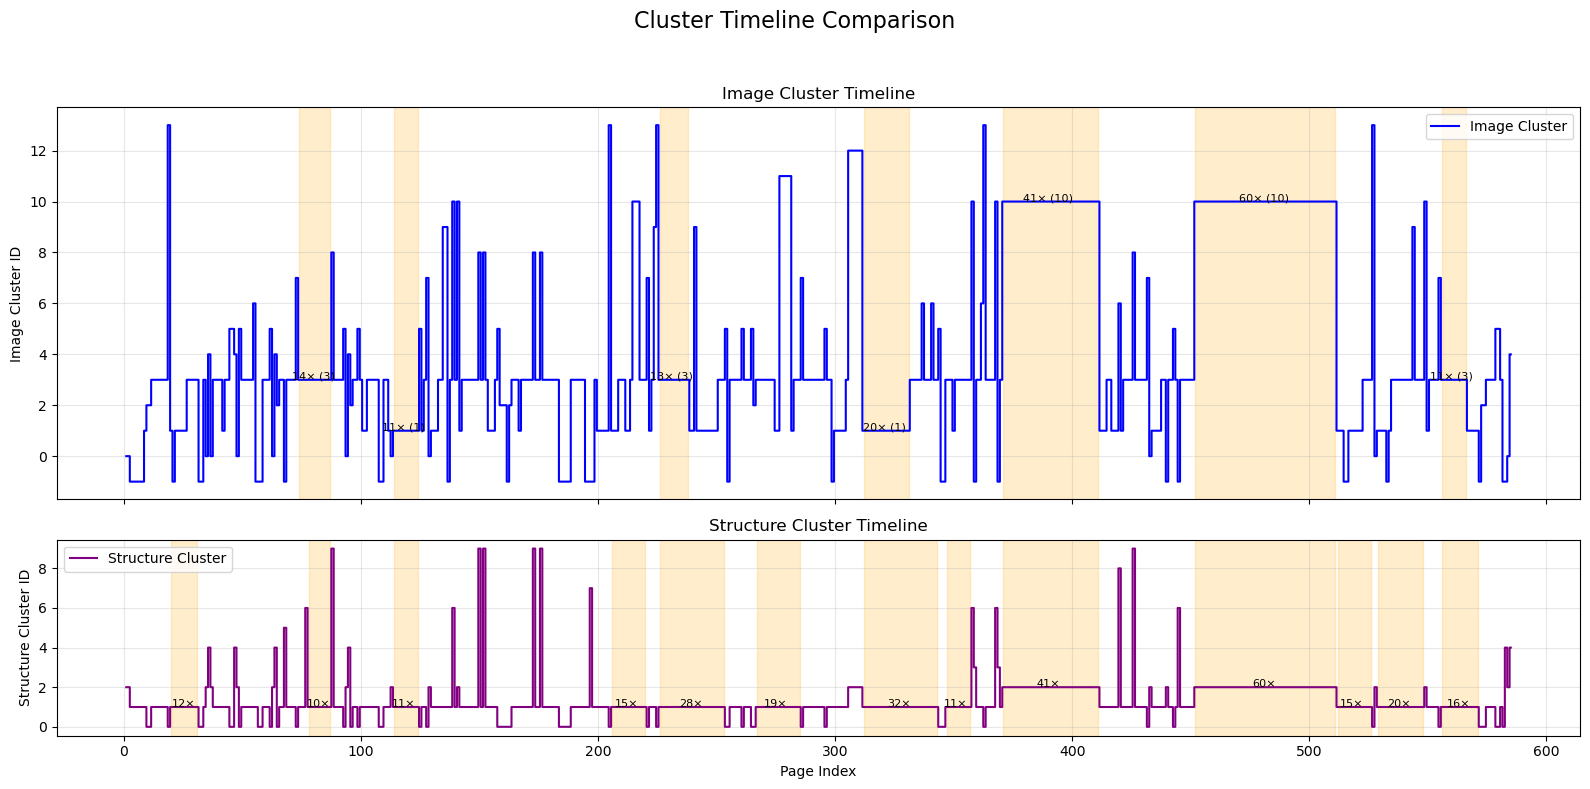

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def plot_cluster_timelines(image_labels, structure_labels):
    assert len(image_labels) == len(structure_labels), "两个标签长度应一致"
    
    image_labels = np.array(image_labels)
    structure_labels = np.array(structure_labels)
    n = len(image_labels)
    x = np.arange(1, n + 1)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    fig.suptitle("Cluster Timeline Comparison", fontsize=16)

    # ========== 上方：图像聚类 ==========
    ax1.plot(x, image_labels, drawstyle='steps-mid', label='Image Cluster', color='blue')
    ax1.set_ylabel("Image Cluster ID")
    ax1.set_title("Image Cluster Timeline")

    # 标记新页面
    # seen_clusters = set()
    # for i, label in enumerate(image_labels):
    #     if label not in seen_clusters:
    #         ax1.axvline(x=i+1, color='green', linestyle='--', alpha=0.4)
    #         ax1.text(i+1, label, 'New', color='green', fontsize=7, rotation=90, va='bottom')
    #         seen_clusters.add(label)

    # 标记重复段（≥10）
    repeat_start = 0
    for i in range(1, n):
        if image_labels[i] != image_labels[i - 1]:
            run_len = i - repeat_start
            if run_len >= 10:
                ax1.axvspan(repeat_start + 1, i, color='orange', alpha=0.2)
                ax1.text((repeat_start + i)//2, image_labels[i - 1], f"{run_len}× ({image_labels[i - 1]})", fontsize=8, ha='center', color='black')
            repeat_start = i
    run_len = n - repeat_start
    if run_len >= 10:
        ax1.axvspan(repeat_start + 1, n, color='orange', alpha=0.2)
        ax1.text((repeat_start + n)//2, image_labels[-1], f"{run_len}× ({image_labels[-1]})", fontsize=8, ha='center', color='black')

    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # ========== 下方：结构聚类 ==========
    ax2.plot(x, structure_labels, drawstyle='steps-mid', color='purple', label='Structure Cluster')
    ax2.set_ylabel("Structure Cluster ID")
    ax2.set_xlabel("Page Index")
    ax2.set_title("Structure Cluster Timeline")

    # 标记重复段（≥10）
    repeat_start = 0
    for i in range(1, n):
        if structure_labels[i] != structure_labels[i - 1]:
            run_len = i - repeat_start
            if run_len >= 10:
                ax2.axvspan(repeat_start + 1, i, color='orange', alpha=0.2)
                ax2.text((repeat_start + i)//2, structure_labels[i - 1], f"{run_len}×", fontsize=8, ha='center', color='black')
            repeat_start = i
    run_len = n - repeat_start
    if run_len >= 10:
        ax2.axvspan(repeat_start + 1, n, color='orange', alpha=0.2)
        ax2.text((repeat_start + n)//2, structure_labels[-1], f"{run_len}×", fontsize=8, ha='center', color='black')


    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_cluster_timelines(image_labels,structure_labels)

In [23]:
def compute_repeat_metrics(labels, min_repeat_length=2):
    """
    输入：
        labels: 页面聚类标签列表（如 image_labels）
        min_repeat_length: 只统计重复长度 ≥ min_repeat_length 的段
    输出：
        包含各种 UI 坑度量指标的字典
    """
    n = len(labels)
    repeat_segments = []
    total_repeat_steps = 0
    max_repeat_length = 0

    i = 0
    while i < n:
        curr = labels[i]
        j = i + 1
        while j < n and labels[j] == curr:
            j += 1
        run_len = j - i
        if run_len >= min_repeat_length:
            repeat_segments.append((i, j - 1, curr, run_len))
            total_repeat_steps += run_len
            max_repeat_length = max(max_repeat_length, run_len)
        i = j

    return {
        "total_pages": n,
        "repeat_segment_count": len(repeat_segments),
        "total_repeat_steps": total_repeat_steps,
        "max_repeat_length": max_repeat_length,
        "repeat_ratio": round(total_repeat_steps / n, 4),
        "repeat_segments": repeat_segments  # [(start, end, cluster, length), ...]
    }

metrics1 = compute_repeat_metrics(image_labels, min_repeat_length=10)
metrics2 = compute_repeat_metrics(structure_labels, min_repeat_length=10)
print("image")
print(metrics1)
print("structure")
print(metrics2)


image
{'total_pages': 585, 'repeat_segment_count': 7, 'total_repeat_steps': 170, 'max_repeat_length': 60, 'repeat_ratio': 0.2906, 'repeat_segments': [(73, 86, 3, 14), (113, 123, 1, 11), (225, 237, 3, 13), (311, 330, 1, 20), (370, 410, 10, 41), (451, 510, 10, 60), (555, 565, 3, 11)]}
structure
{'total_pages': 585, 'repeat_segment_count': 13, 'total_repeat_steps': 290, 'max_repeat_length': 60, 'repeat_ratio': 0.4957, 'repeat_segments': [(19, 30, 1, 12), (77, 86, 1, 10), (113, 123, 1, 11), (205, 219, 1, 15), (225, 252, 1, 28), (266, 284, 1, 19), (311, 342, 1, 32), (346, 356, 1, 11), (370, 410, 2, 41), (451, 510, 2, 60), (511, 525, 1, 15), (528, 547, 1, 20), (555, 570, 1, 16)]}
